In [122]:
import plotly.graph_objects as go

import numpy as np

import pandas as pd

from datetime import datetime

import yfinance as yf

import plotly.express as px

import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import seaborn as sns

In [ ]:
def candel_plot(ticker):
    ticker = yf.Ticker(ticker)
    df = ticker.history(period='max')
    df = df.reset_index()
    fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

    fig.show()

In [ ]:
def candel_plot_2020(ticker):
    ticker = yf.Ticker(ticker)
    df = ticker.history(start="2020-01-01", end= datetime.today().strftime('%Y-%m-%d'))
    df = df.reset_index()
    fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

    fig.show()

In [ ]:
candel_plot('SBRY.L')

In [ ]:
candel_plot_2020('palm.l')

In [ ]:
def line_plot_px_max(ticker):
    ticker = yf.Ticker(ticker)
    df = ticker.history(period='max')
    df = df.reset_index()
    df['Date'] = [str(i) for i in df['Date']]
    fig = px.line(df, x='Date', y= 'Close' )
    fig.show()

In [ ]:
line_plot_px_max('cgh.l')

In [ ]:
ticker = yf.Ticker('amte.l')
df = ticker.history(period='max')

In [ ]:
df = df.reset_index()

In [ ]:
df

In [ ]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['High'])])
fig.show()

In [ ]:
def line_plot_go_max(ticker):
    ticker = yf.Ticker(ticker)
    df = ticker.history(period='max')
    df = df.reset_index()
    fig = go.Figure([go.Scatter(x=df['Date'], y=df['High'])])
    fig.show()

In [ ]:
def line_plot_go_2020(ticker):
    ticker = yf.Ticker(ticker)
    df = ticker.history(start="2020-01-01", end= datetime.today().strftime('%Y-%m-%d'))
    df = df.reset_index()
    fig = go.Figure([go.Scatter(x=df['Date'], y=df['High'])])
    fig.show()
    print(ticker)

In [ ]:
line_plot_go_2020('cgh.l')
line_plot_go_2020('kat.l')

In [ ]:
df = px.data.stocks()
fig = px.line(df, x="date", y=df.columns,
              hover_data={"date": "|%B %d, %Y"},
              title='custom tick labels with ticklabelmode="period"')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [ ]:
df = px.data.stocks()

In [ ]:
len(df)

In [ ]:
df  # 以某一周为起点，初始值为1，用其后每周close的价格除以初始值，得到涨幅概率，并依次显现

In [ ]:
df = px.data.stocks(indexed=True)-1
fig = px.area(df, facet_col="company", facet_col_wrap=2)
fig.show()

In [ ]:
px.data.stocks(indexed=True)-1

# get a bunch of stock close prices and plot them together

In [ ]:
# list of tickers
tickers = ['PALM.L','COBR.L','KAT.L','AMTE.L','KNB.L','ECR.L','KAV.L','IRR.L','MNRG.L',
           'CCZ.L', 'THR.L', 'AVO.L','CGH.L']
# print(len(tickers))

In [ ]:
# create lists with names of tickers in a dict
ticker_dict = {key:[] for key in tickers}
print(ticker_dict)

In [ ]:
# print(list(ticker_dict))
# print(list(ticker_dict.values()))

In [ ]:
for t, lst in ticker_dict.items():
        lst.append(yf.Ticker(t).history(start="2020-01-01", end= datetime.today()
                             .strftime('%Y-%m-%d'))['Close'])

In [ ]:
print(ticker_dict)

In [ ]:
ticker_dict['PALM.L']

In [ ]:
pd.DataFrame(ticker_dict)['PALM.L']

In [ ]:
pd.DataFrame.from_dict(ticker_dict)

In [29]:
amte = yf.Ticker('AMTE.L').history(start="2020-01-01", end= datetime.today()
                             .strftime('%Y-%m-%d'))['Close']
df_amte = pd.DataFrame(amte)
df_amte.columns = ['amte/100']
df_amte['amte_raised'] = 73.35

In [32]:
cobr = yf.Ticker('COBR.L').history(start="2020-01-01", end= datetime.today()
                             .strftime('%Y-%m-%d'))['Close']
df_cobr = pd.DataFrame(cobr)
df_cobr.columns = ['cobr']
df_amte['cobr_raised'] = 2.25

In [31]:
kat = yf.Ticker('KAT.L').history(start="2020-01-01", end= datetime.today()
                             .strftime('%Y-%m-%d'))['Close']
df_kat = pd.DataFrame(kat)
df_kat.columns = ['kat']
df_amte['kat_raised'] = 1.25

In [35]:
df = pd.concat([df_cobr, df_amte, df_kat])
df['kat_raised'] = 1.25
df['cobr_raised'] = 2.25
df['amte_raised'] = 73.35
df.head()

,cobr,amte/100,amte_raised,kat_raised,cobr_raised,kat
Date,,,,,,
2020-01-02,1.25,NaN,73.35,1.25,2.25,NaN
2020-01-03,1.25,NaN,73.35,1.25,2.25,NaN
2020-01-06,1.25,NaN,73.35,1.25,2.25,NaN
2020-01-07,1.25,NaN,73.35,1.25,2.25,NaN
2020-01-08,1.25,NaN,73.35,1.25,2.25,NaN


In [65]:
import matplotlib.style as style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [66]:
plt.style.use('seaborn-notebook')

In [126]:
plt.style.use('seaborn-ticks')

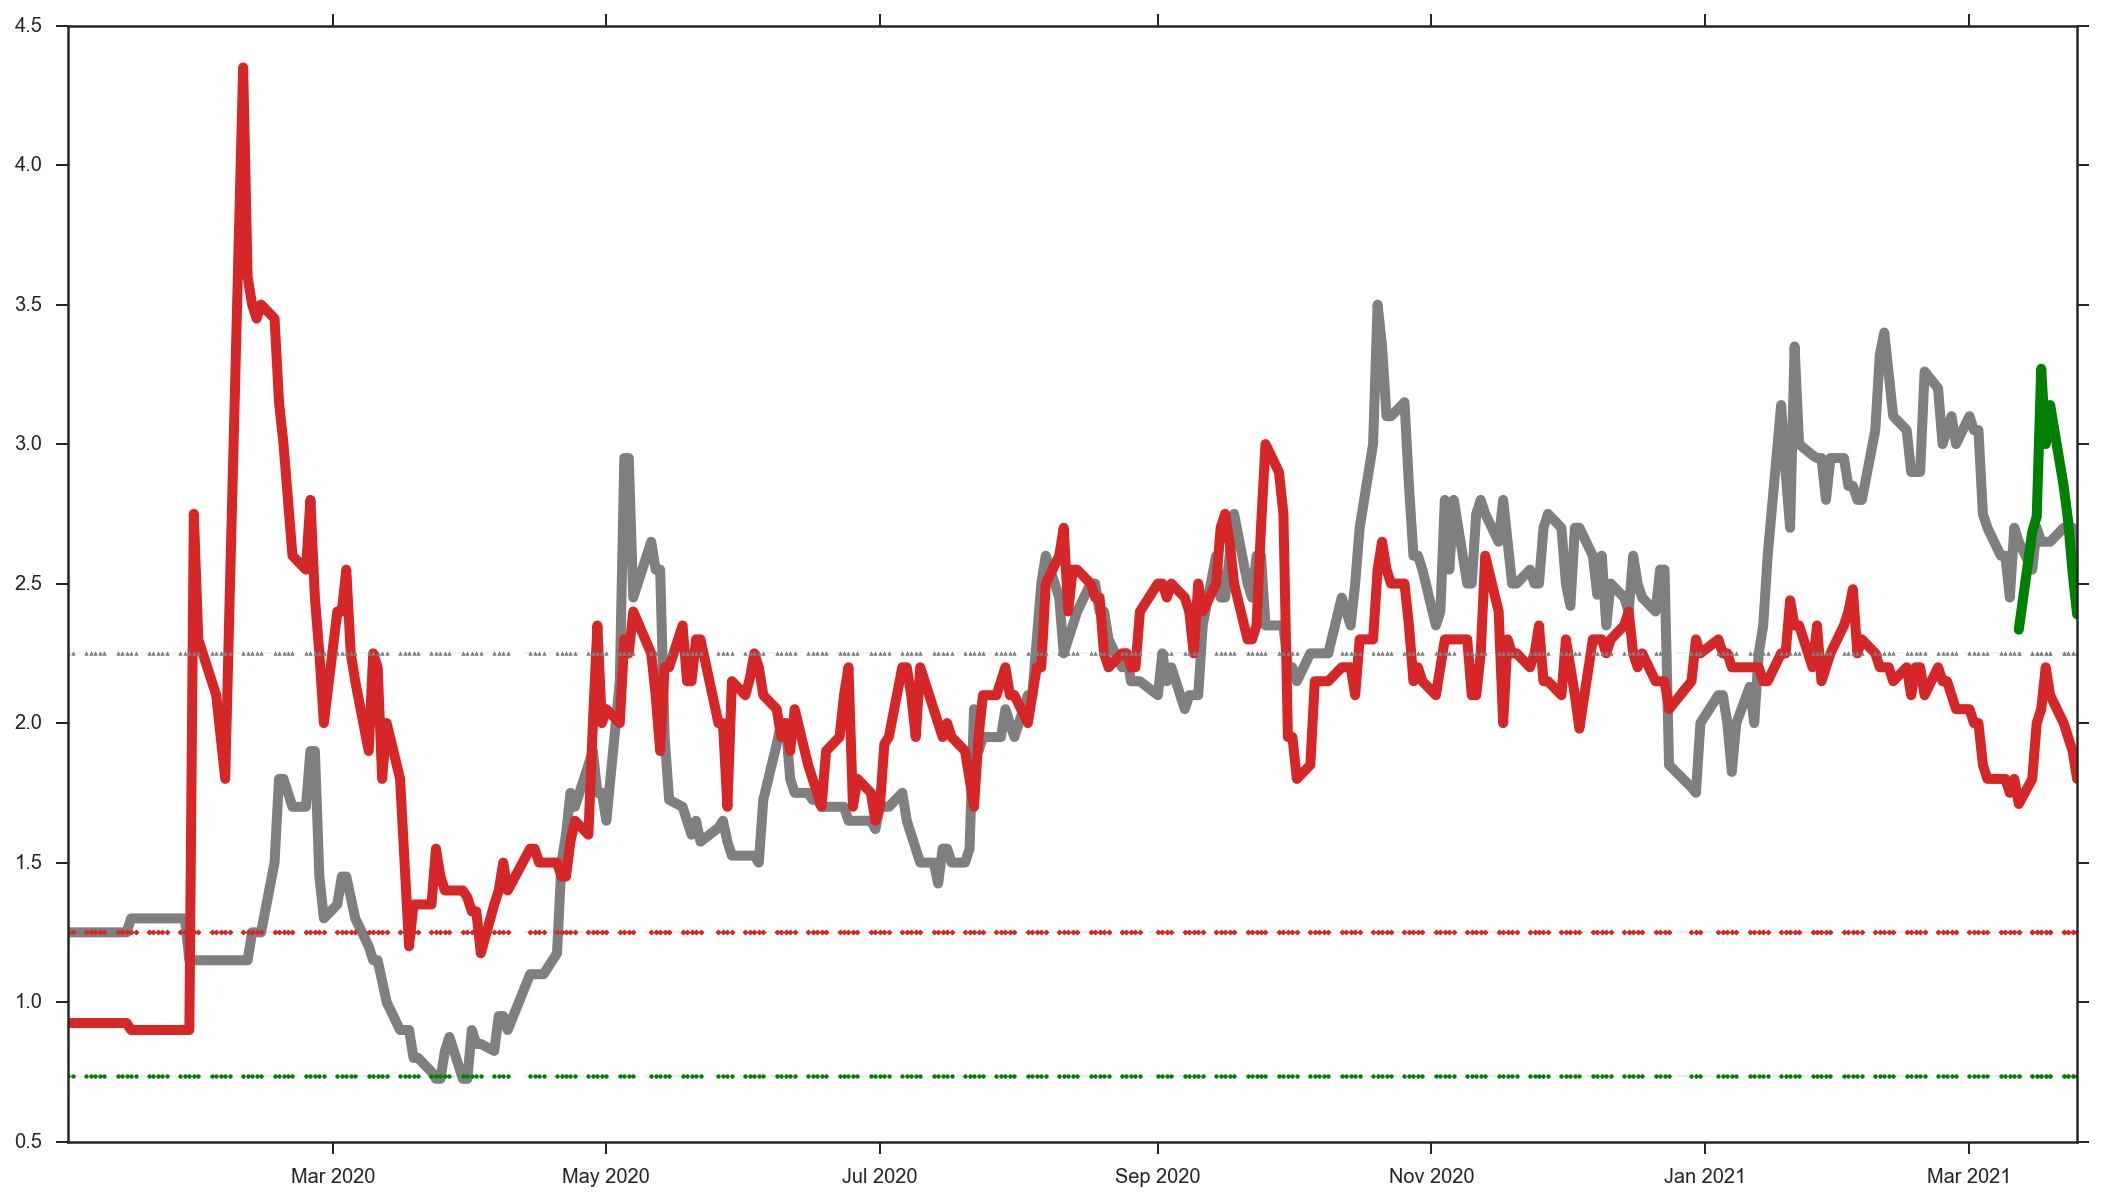

In [131]:
plt.figure(figsize=(18,10))
plt.plot(df.cobr, color='#7f7f7f', linewidth=5)
plt.plot(df.kat, color='#d62728',linewidth=5, )
plt.plot(df['amte/100']/100, color='g',linewidth=5)
plt.plot(df['cobr_raised'], color='#7f7f7f', marker='^', linestyle='dashed',linewidth=0.1, markersize=2 )
plt.plot(df['amte_raised']/100, color='g', marker='o', linestyle='dashed',linewidth=0.1, markersize=2)
plt.plot(df['kat_raised'], color='#d62728', marker='D', linestyle='dashed',linewidth=0.1, markersize=2 )
plt.savefig('3stocks')
plt.show()


In [62]:
cn_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

#1f77b4


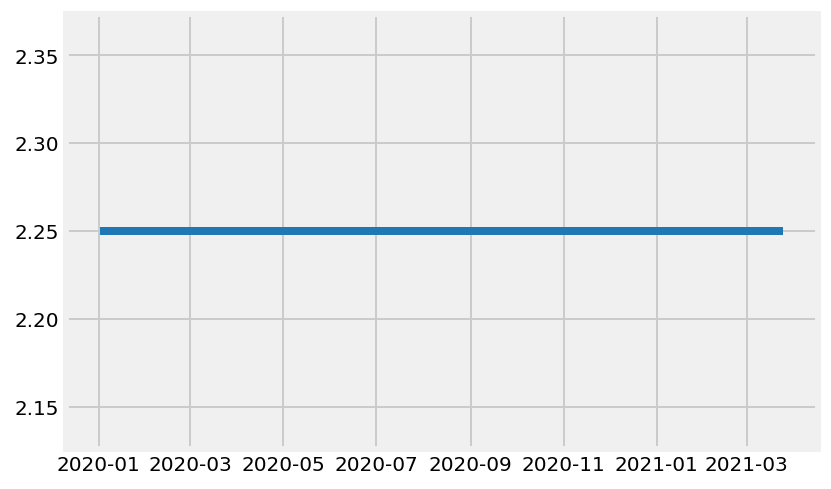

#ff7f0e


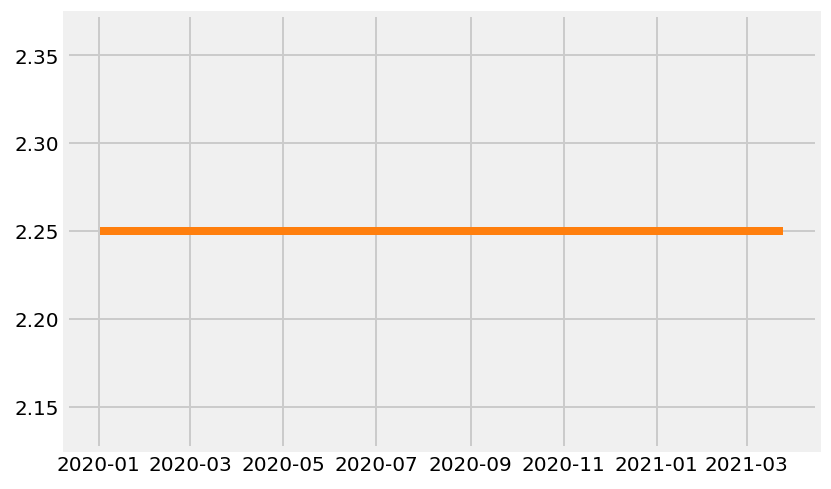

#2ca02c


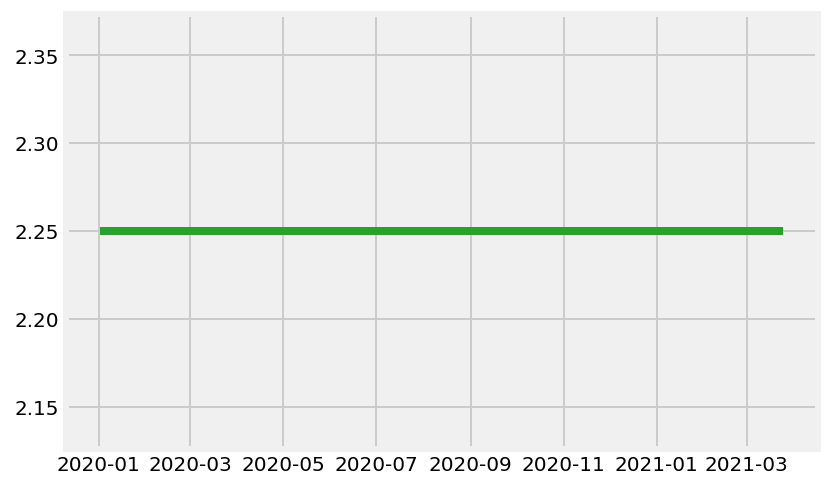

#d62728


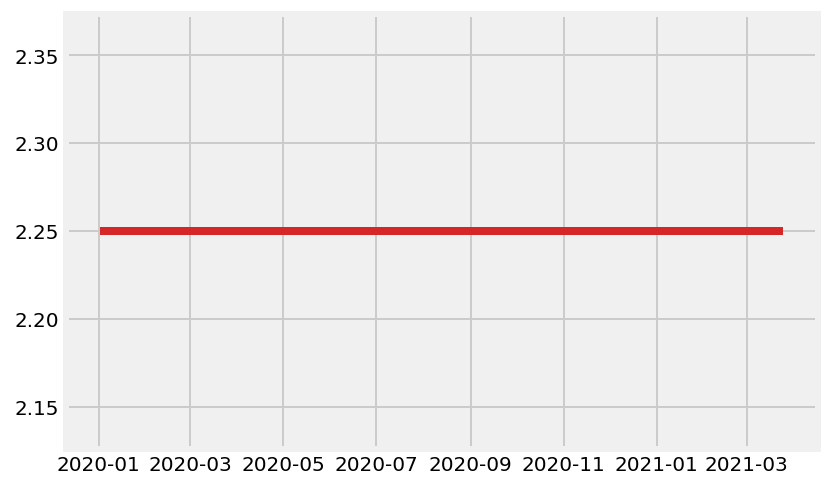

#9467bd


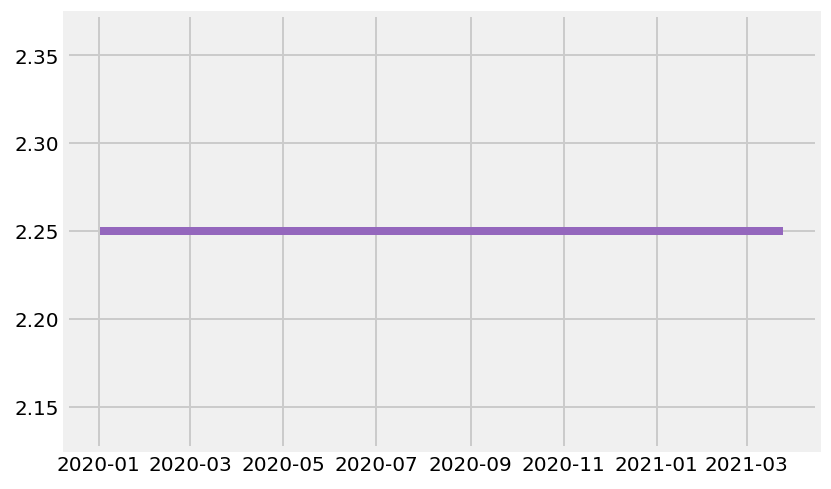

#8c564b


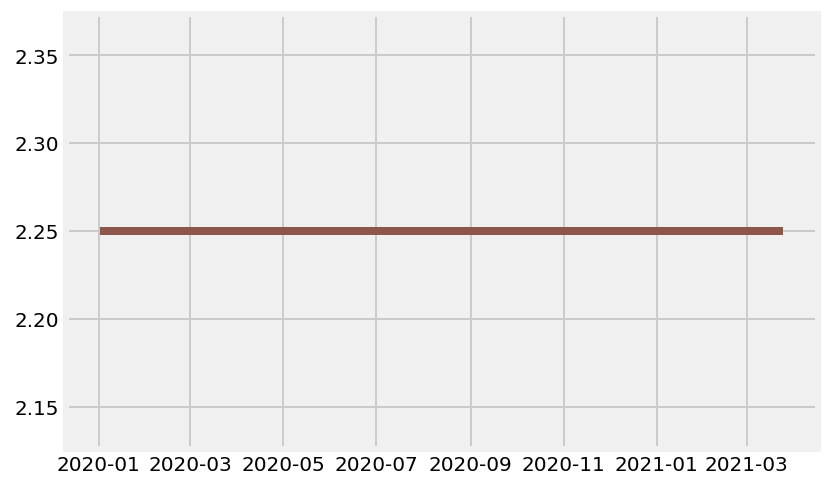

#e377c2


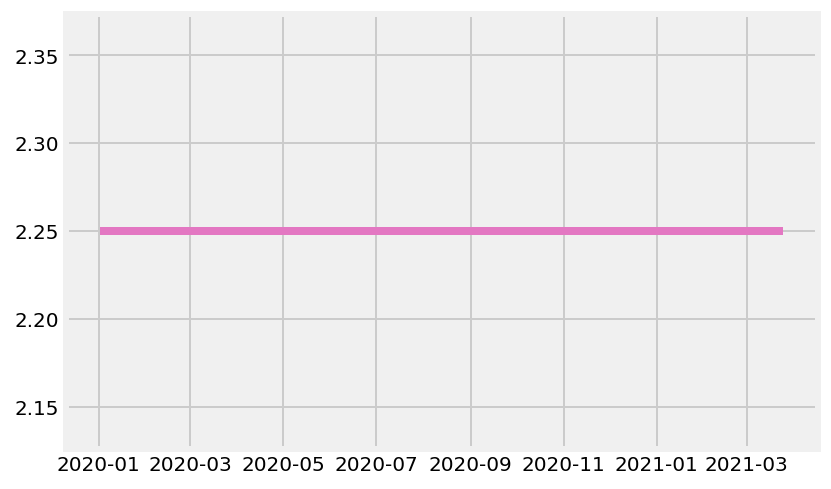

#7f7f7f


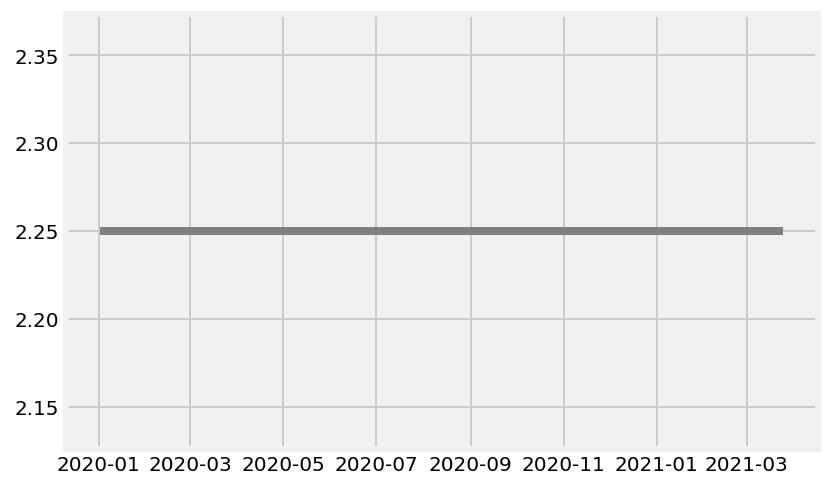

#bcbd22


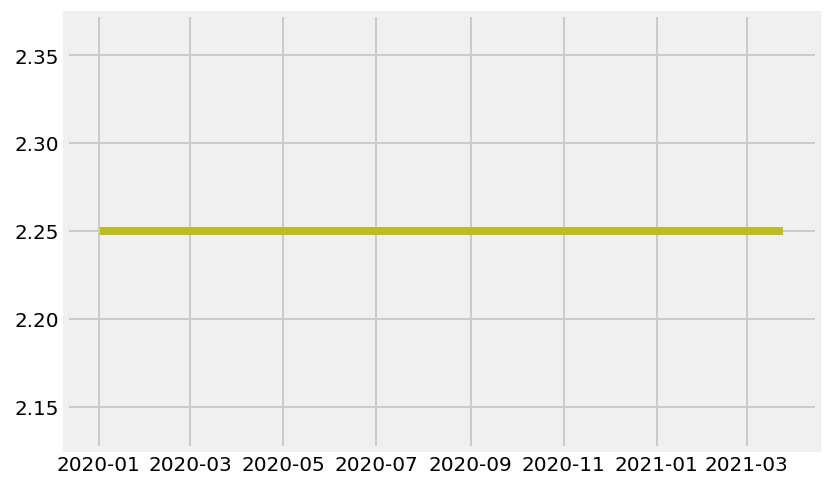

#17becf


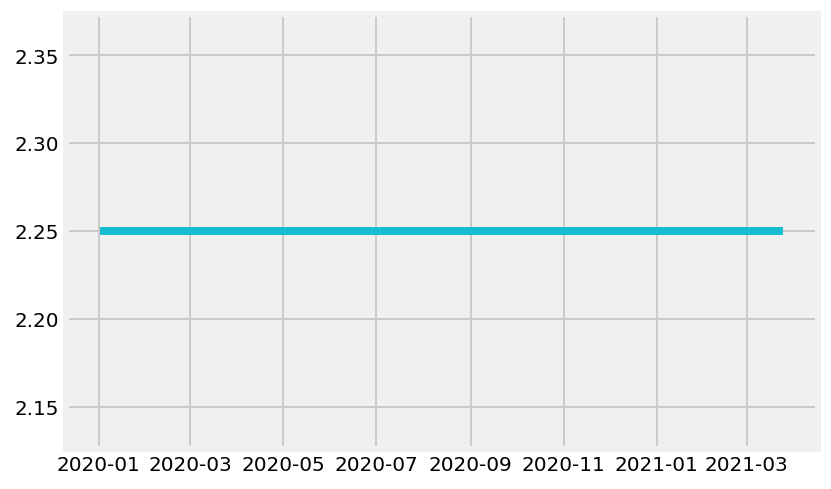

In [64]:
for i in cn_colors:
    print(i)
    plt.plot(df['cobr_raised'], color=i)
    plt.show()

In [136]:
oil = yf.Ticker('B')

In [139]:
brent = oil.history(start="2020-01-01", end= datetime.today()
                             .strftime('%Y-%m-%d'))

In [140]:
brent.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-03-12', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18', '2021-03-19', '2021-03-22', '2021-03-23',
               '2021-03-24', '2021-03-25'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [142]:
 mask = brent.index >= '2021-03-12'

In [143]:
brent[mask]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-12,56.619999,57.639999,56.060001,57.540001,167600,0.0,0
2021-03-15,57.380001,57.380001,55.959999,57.189999,137900,0.0,0
2021-03-16,56.849998,56.849998,55.439999,55.660000,100400,0.0,0
2021-03-17,55.869999,56.419998,54.910000,55.660000,357100,0.0,0
2021-03-18,55.610001,56.220001,53.740002,54.009998,285400,0.0,0
2021-03-19,53.860001,53.860001,51.200001,52.310001,971600,0.0,0
2021-03-22,52.650002,52.650002,51.099998,51.259998,208600,0.0,0
2021-03-23,50.919998,50.919998,48.970001,49.250000,197200,0.0,0
2021-03-24,49.980000,51.349998,49.130001,49.139999,230800,0.0,0


In [144]:
brent.sort_values('High')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-05-14,31.898885,32.608185,30.253697,32.608185,409200,0.0,0
2020-05-15,32.332349,33.012096,31.908738,32.253540,405100,0.0,0
2020-05-13,33.514522,33.711551,31.652604,32.174728,314500,0.0,0
2020-09-11,34.178438,34.327469,33.463074,33.890305,199500,0.0,0
2020-09-14,34.069149,34.526186,33.373657,34.317539,183900,0.0,0
...,...,...,...,...,...,...,...
2020-01-15,64.307750,65.732232,63.737958,65.191910,272500,0.0,0
2020-02-05,65.093664,65.820636,64.101440,65.742043,194000,0.0,0
2020-02-12,65.791172,66.115365,64.965954,65.044548,229500,0.0,0


In [145]:
brent.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,310.000000,310.000000,310.000000,310.000000,3.100000e+02,310.000000,310.0
mean,45.370542,46.241330,44.426647,45.315883,2.354403e+05,0.002581,0.0
std,9.339142,9.251207,9.417702,9.341386,1.395639e+05,0.020188,0.0
min,31.898885,32.608185,29.770985,32.174728,4.790000e+04,0.000000,0.0
25%,37.807279,38.967394,36.794856,37.852648,1.495750e+05,0.000000,0.0
50%,40.703413,41.492188,39.752307,40.627922,2.039000e+05,0.000000,0.0
75%,52.153452,52.934868,51.306878,52.198665,2.757750e+05,0.000000,0.0
max,66.135008,67.392474,64.995426,65.742043,1.294600e+06,0.160000,0.0


Solarize_Light2


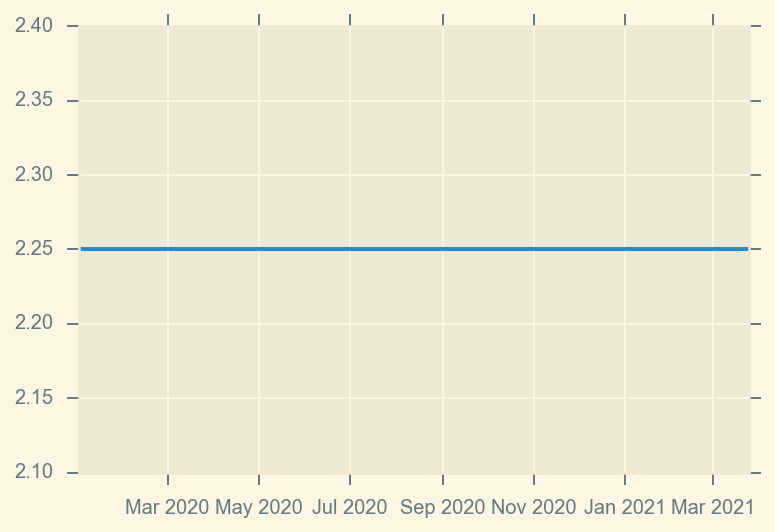

_classic_test_patch


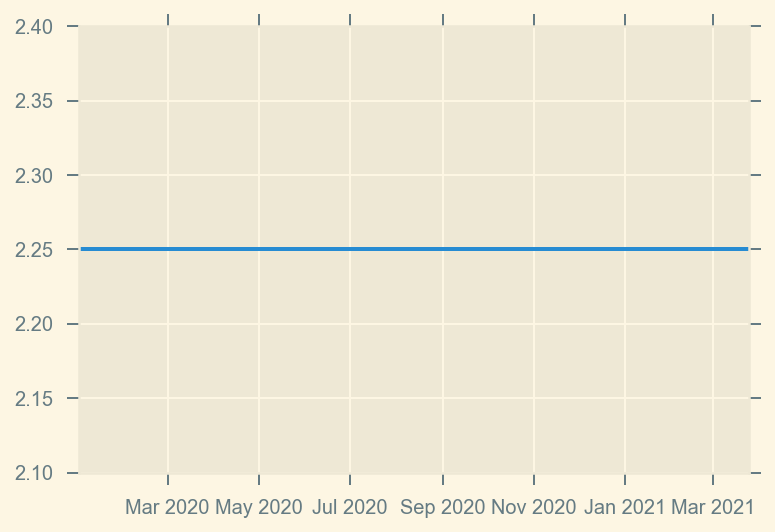

bmh


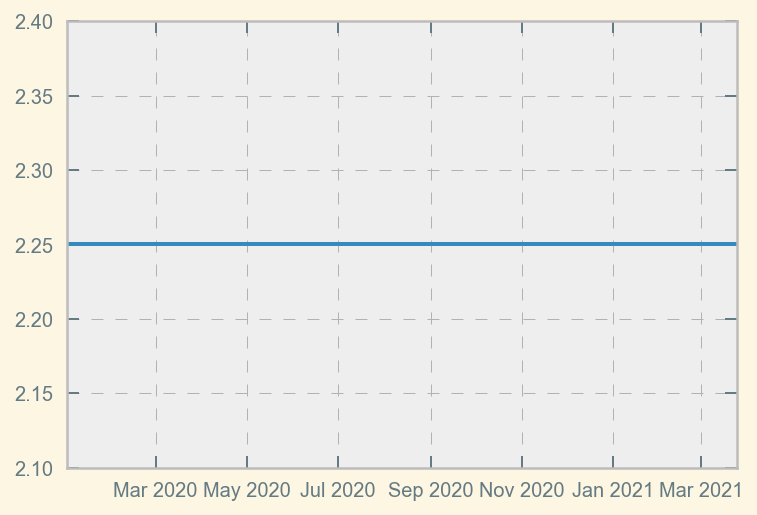

classic


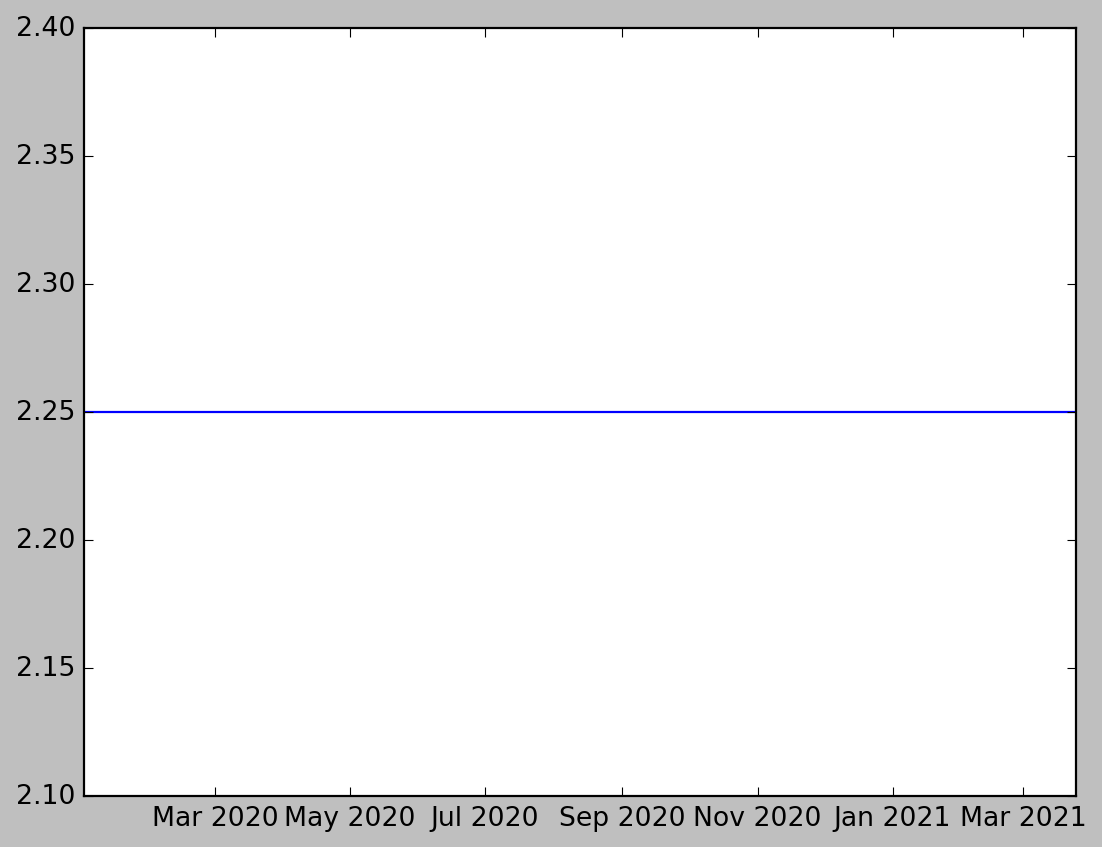

dark_background


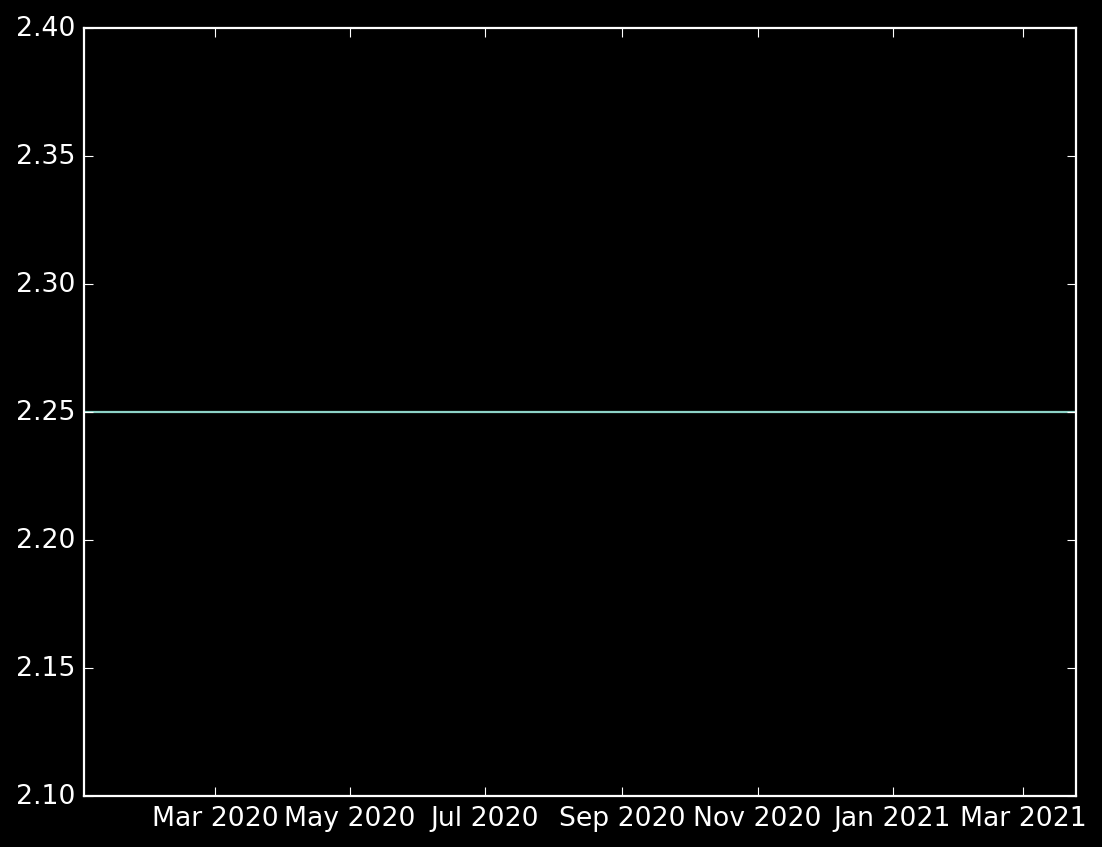

fast


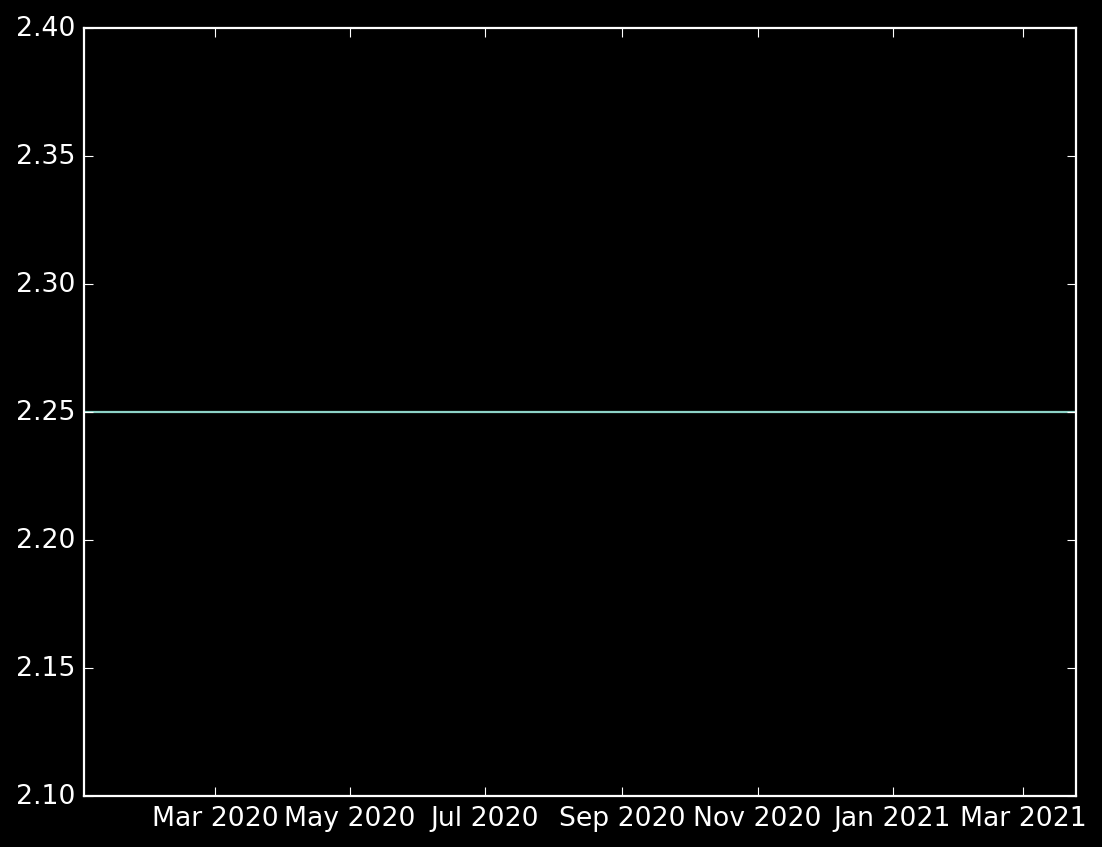

fivethirtyeight


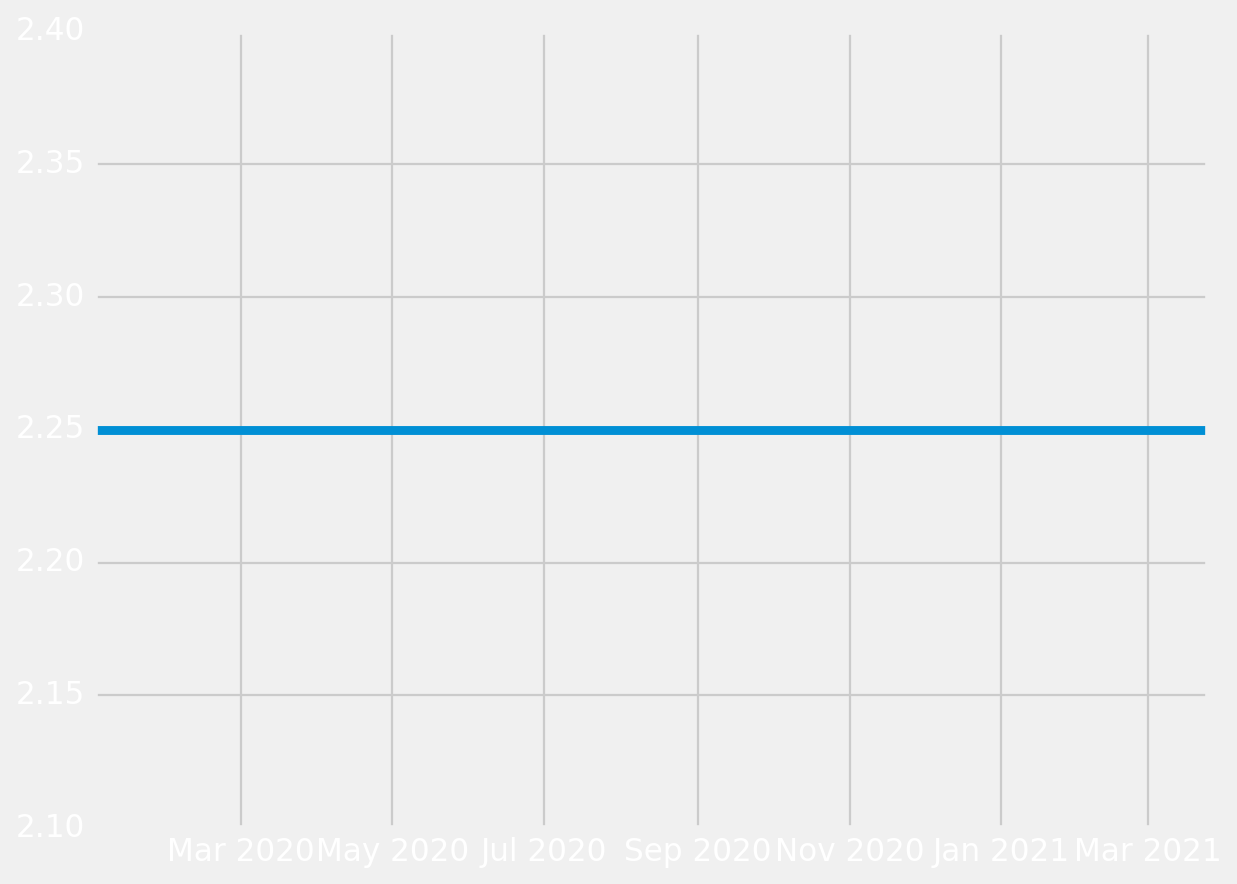

ggplot


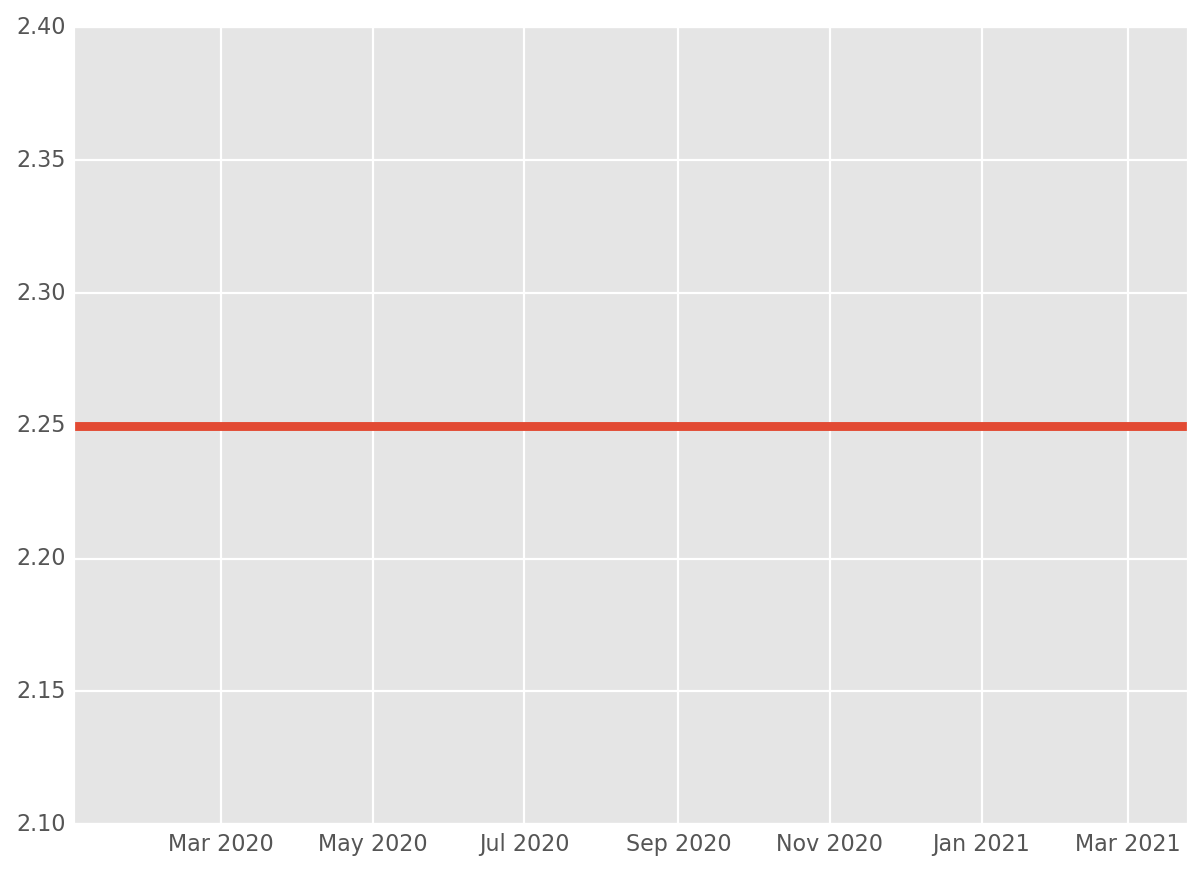

grayscale


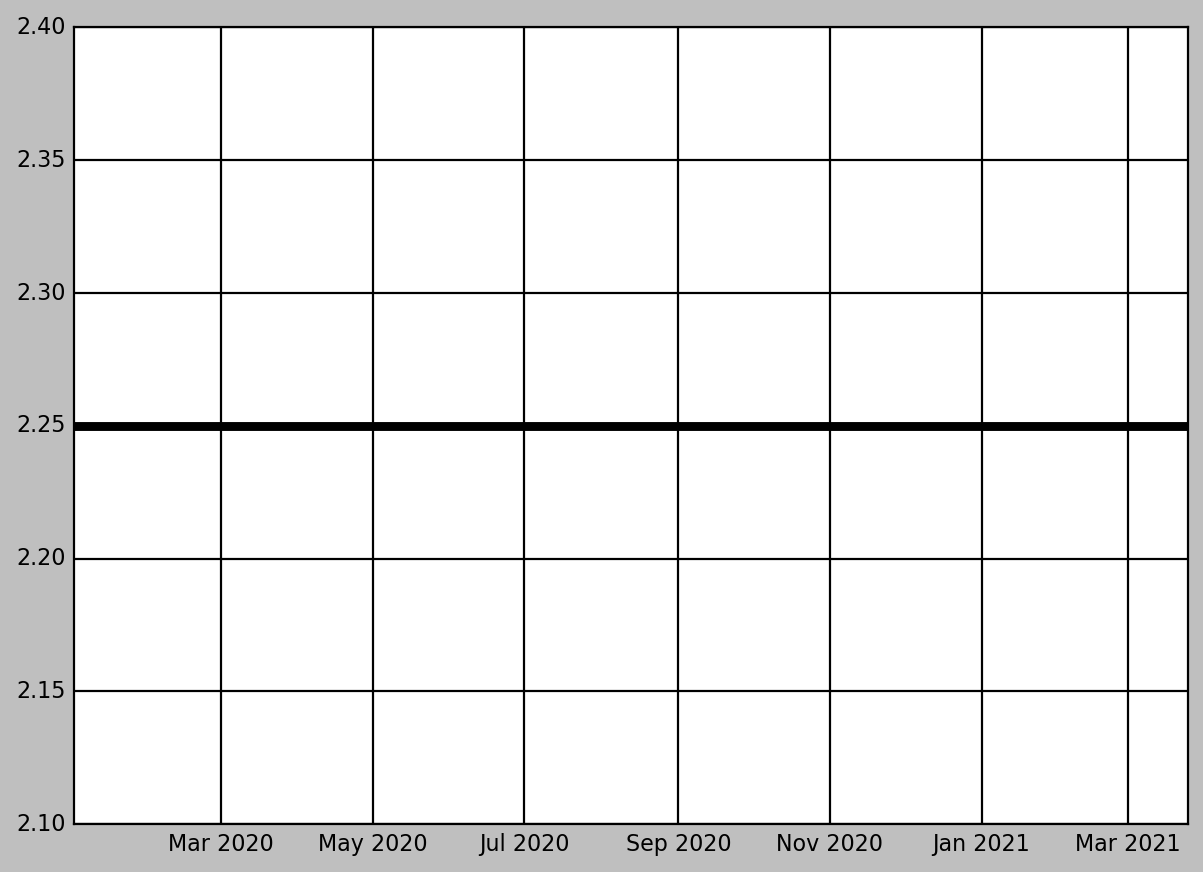

seaborn


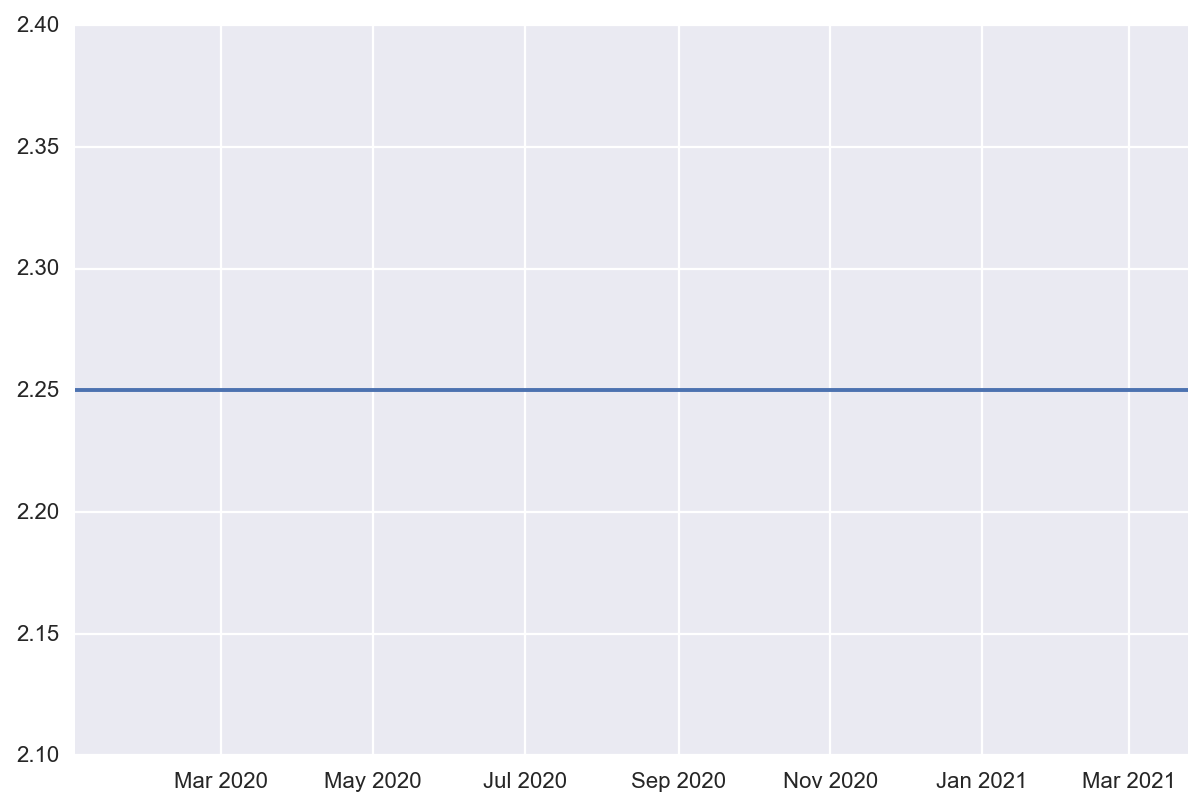

seaborn-bright


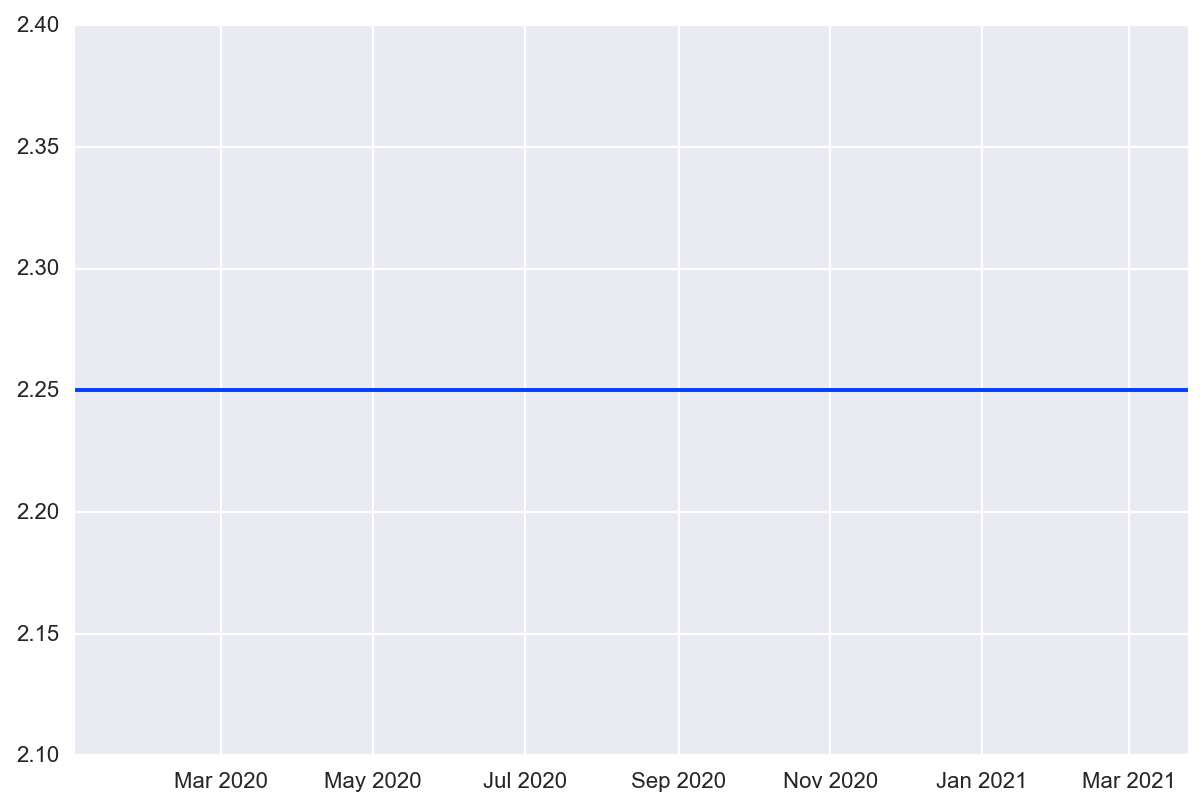

seaborn-colorblind


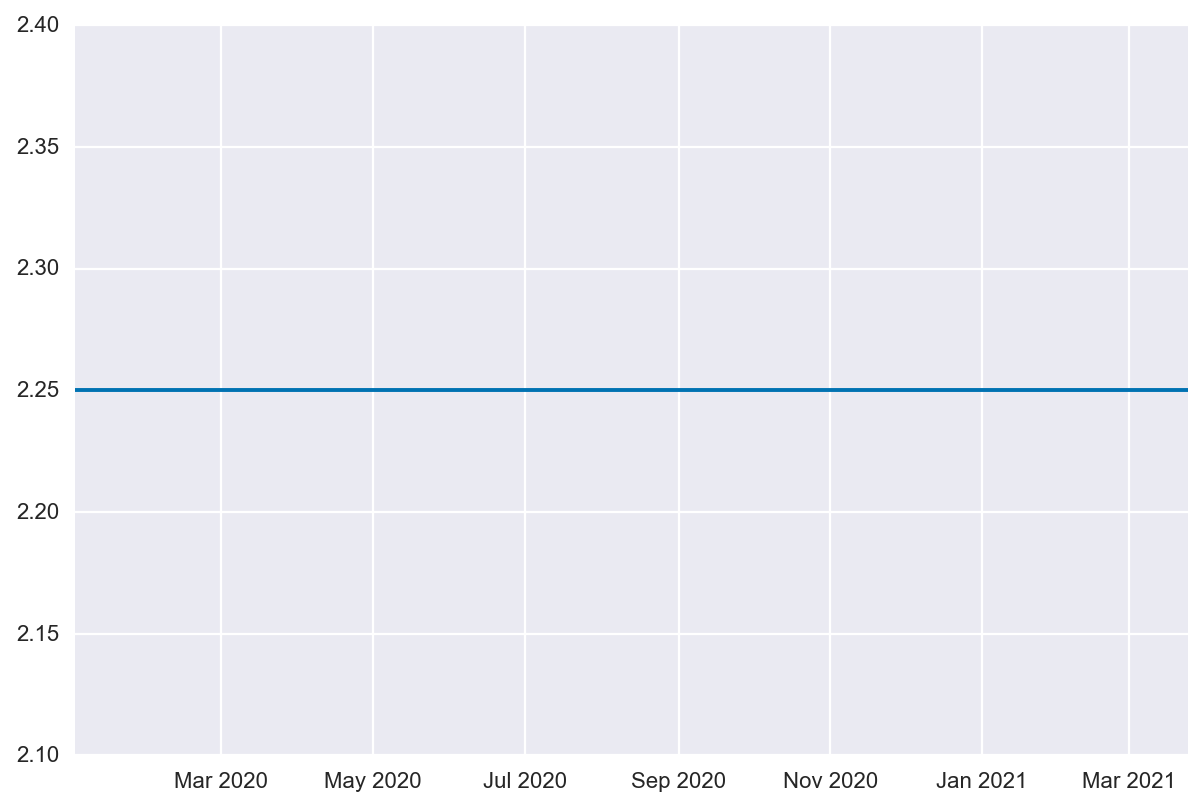

seaborn-dark


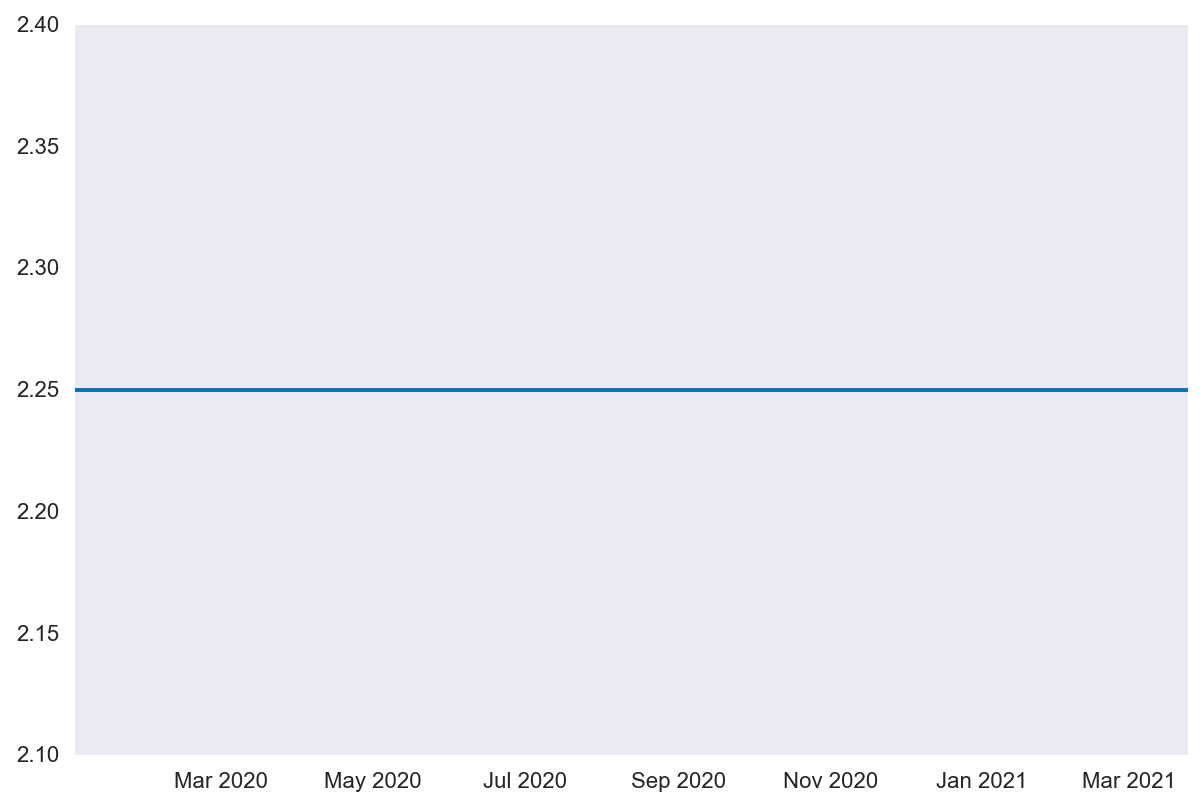

seaborn-dark-palette


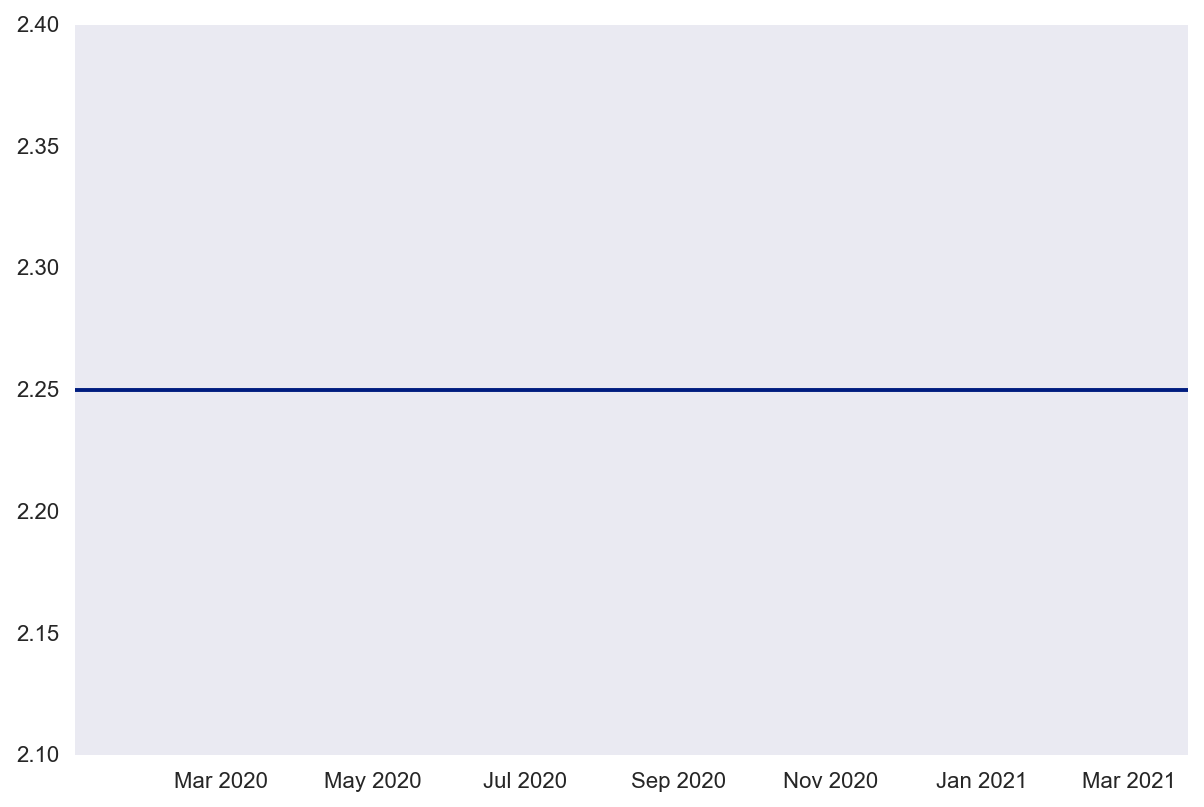

seaborn-darkgrid


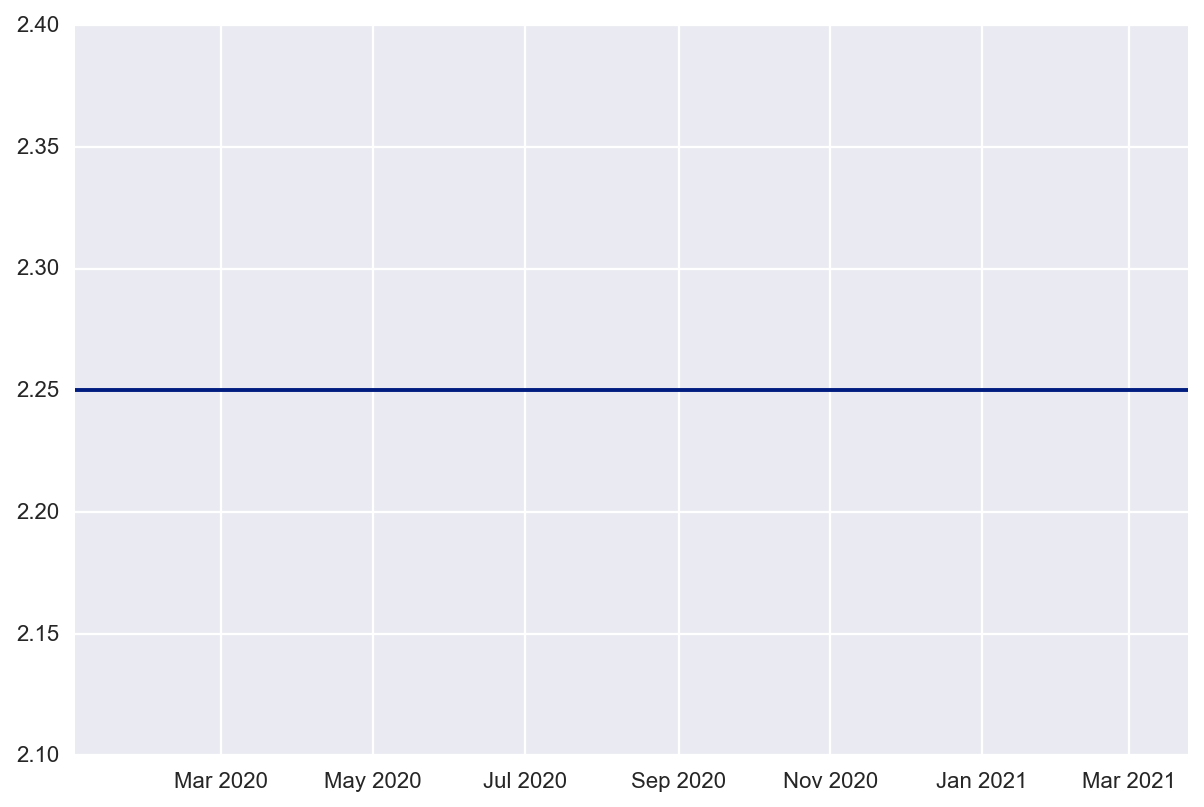

seaborn-deep


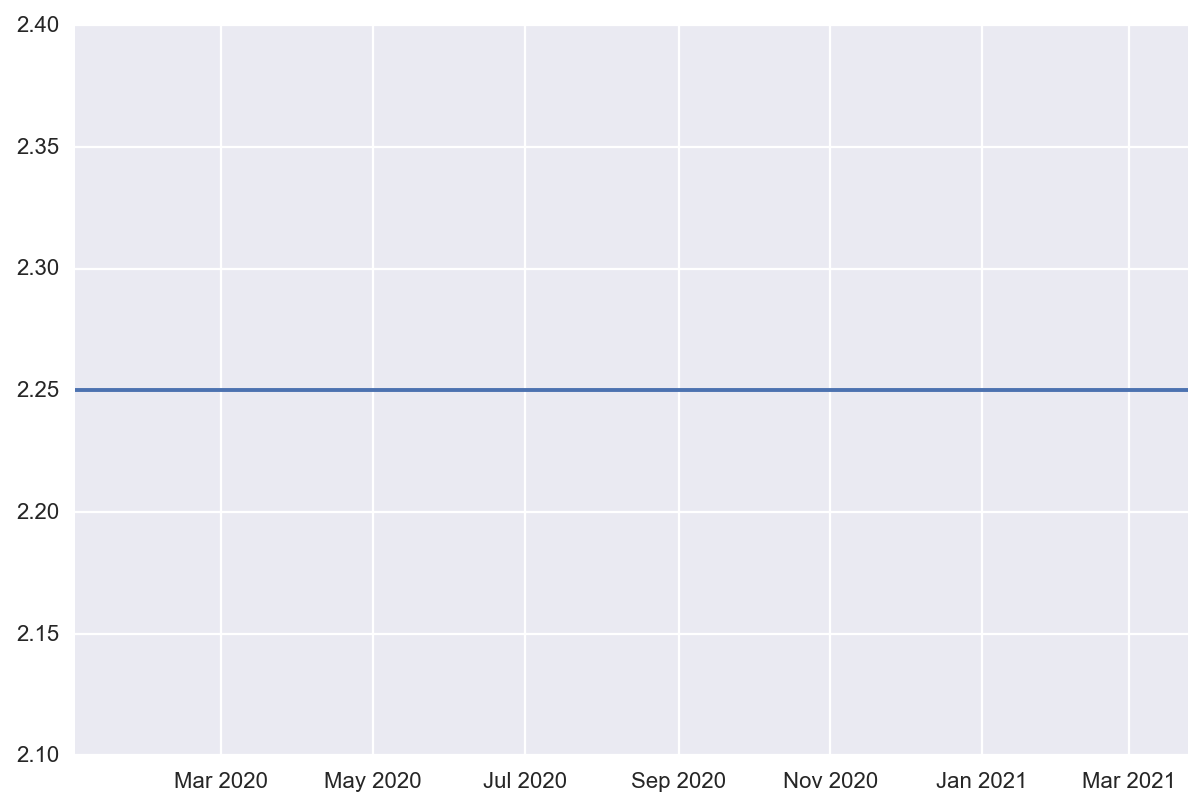

seaborn-muted


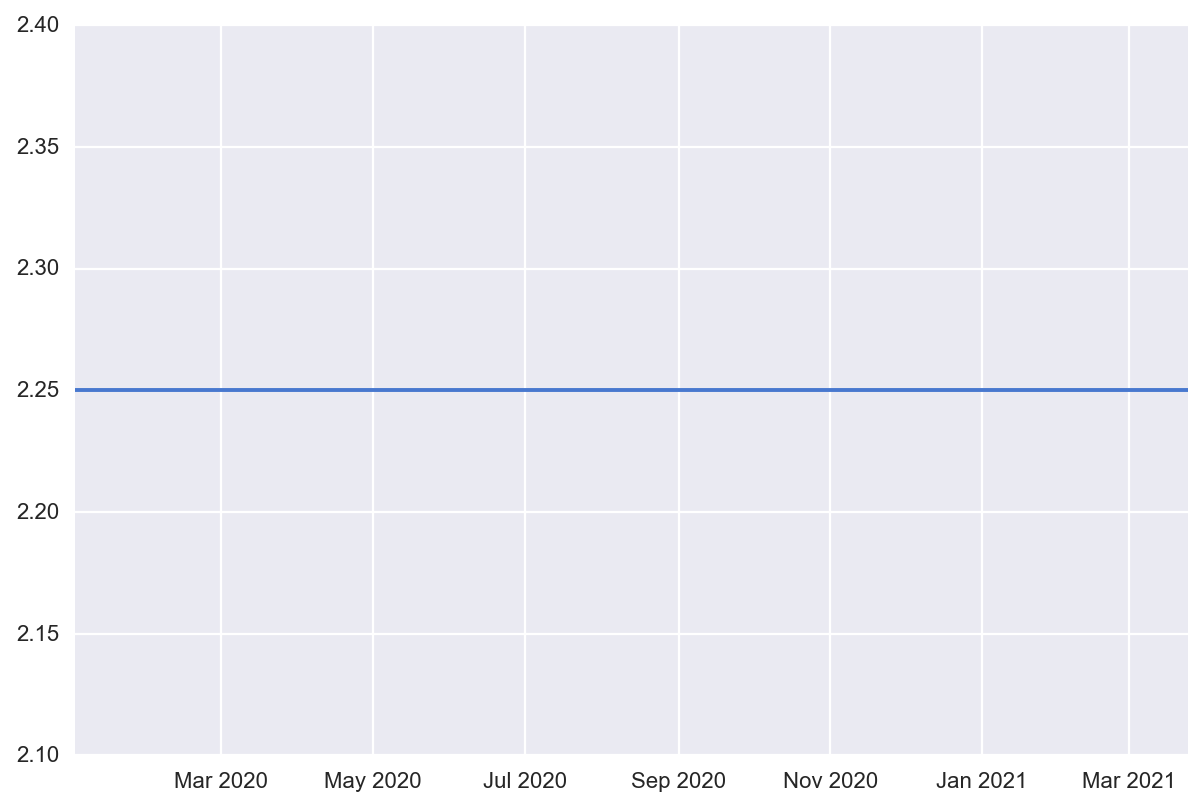

seaborn-notebook


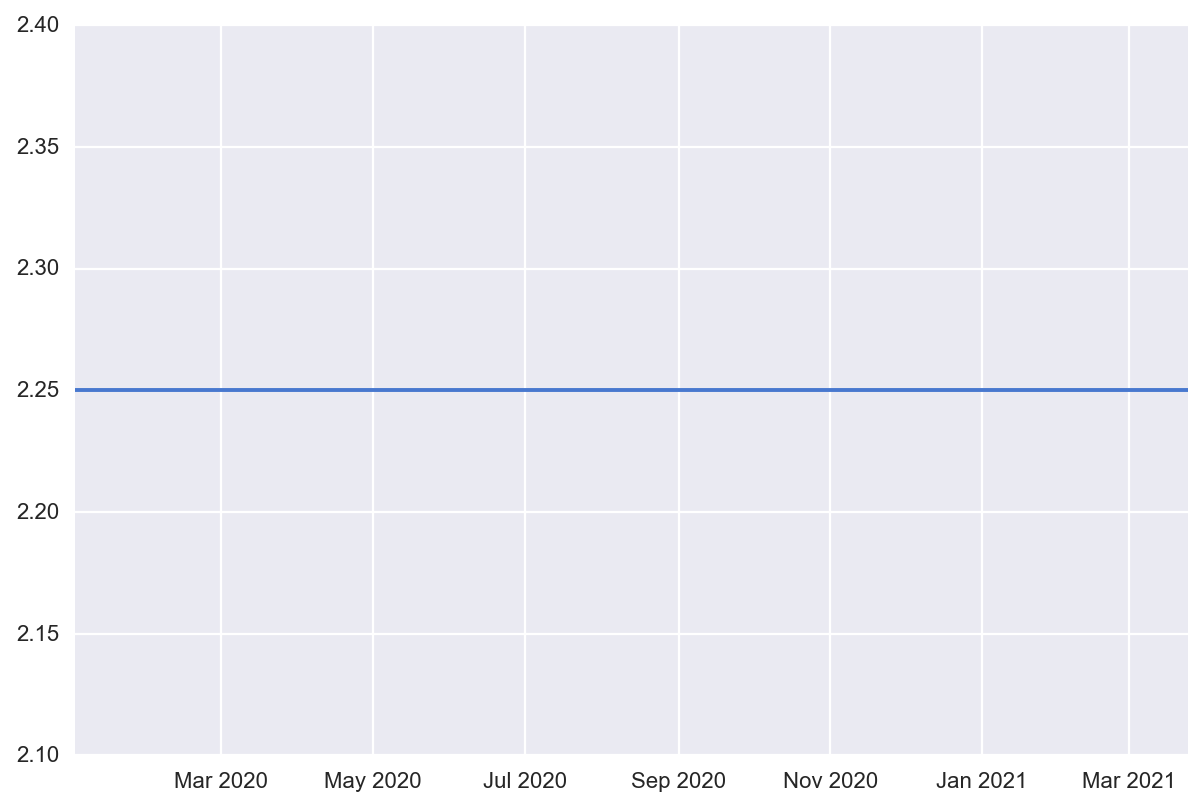

seaborn-paper


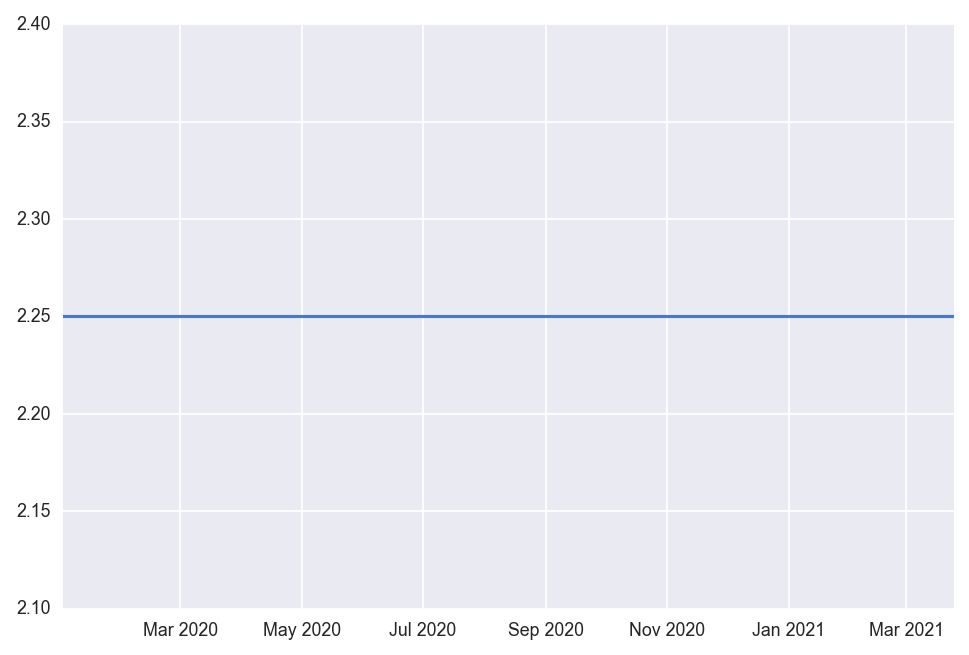

seaborn-pastel


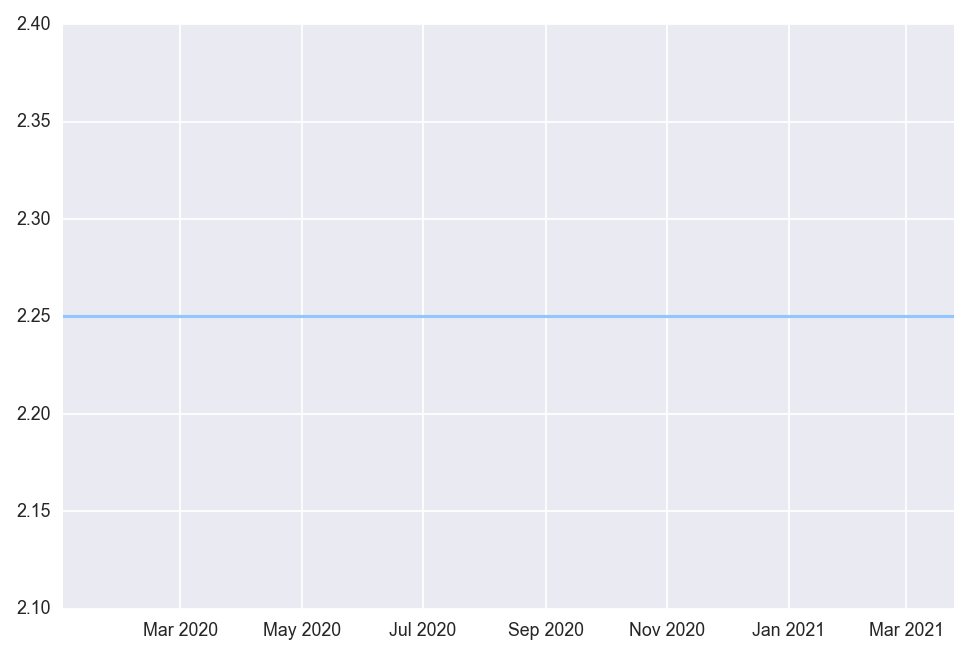

seaborn-poster


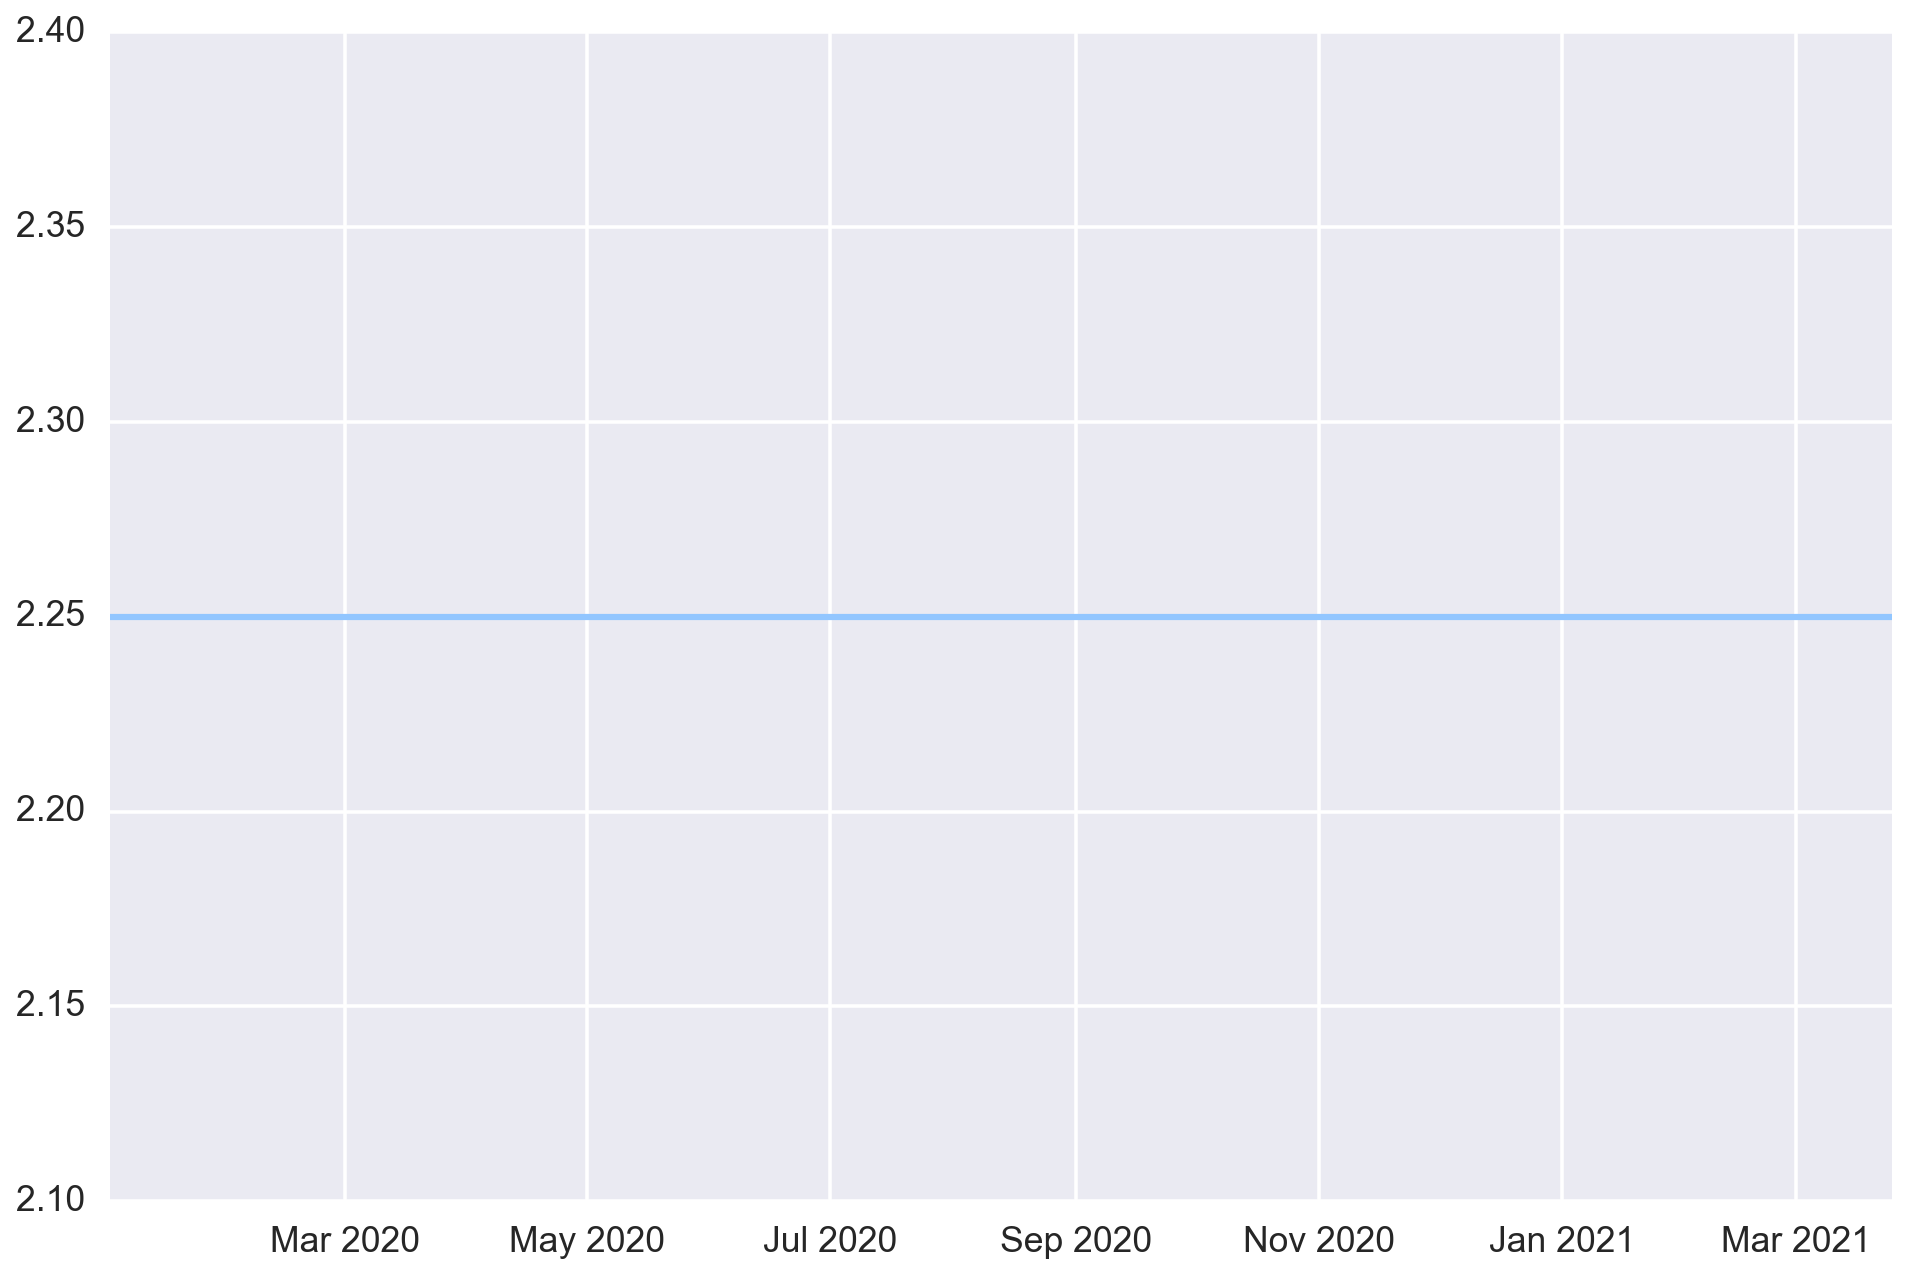

seaborn-talk


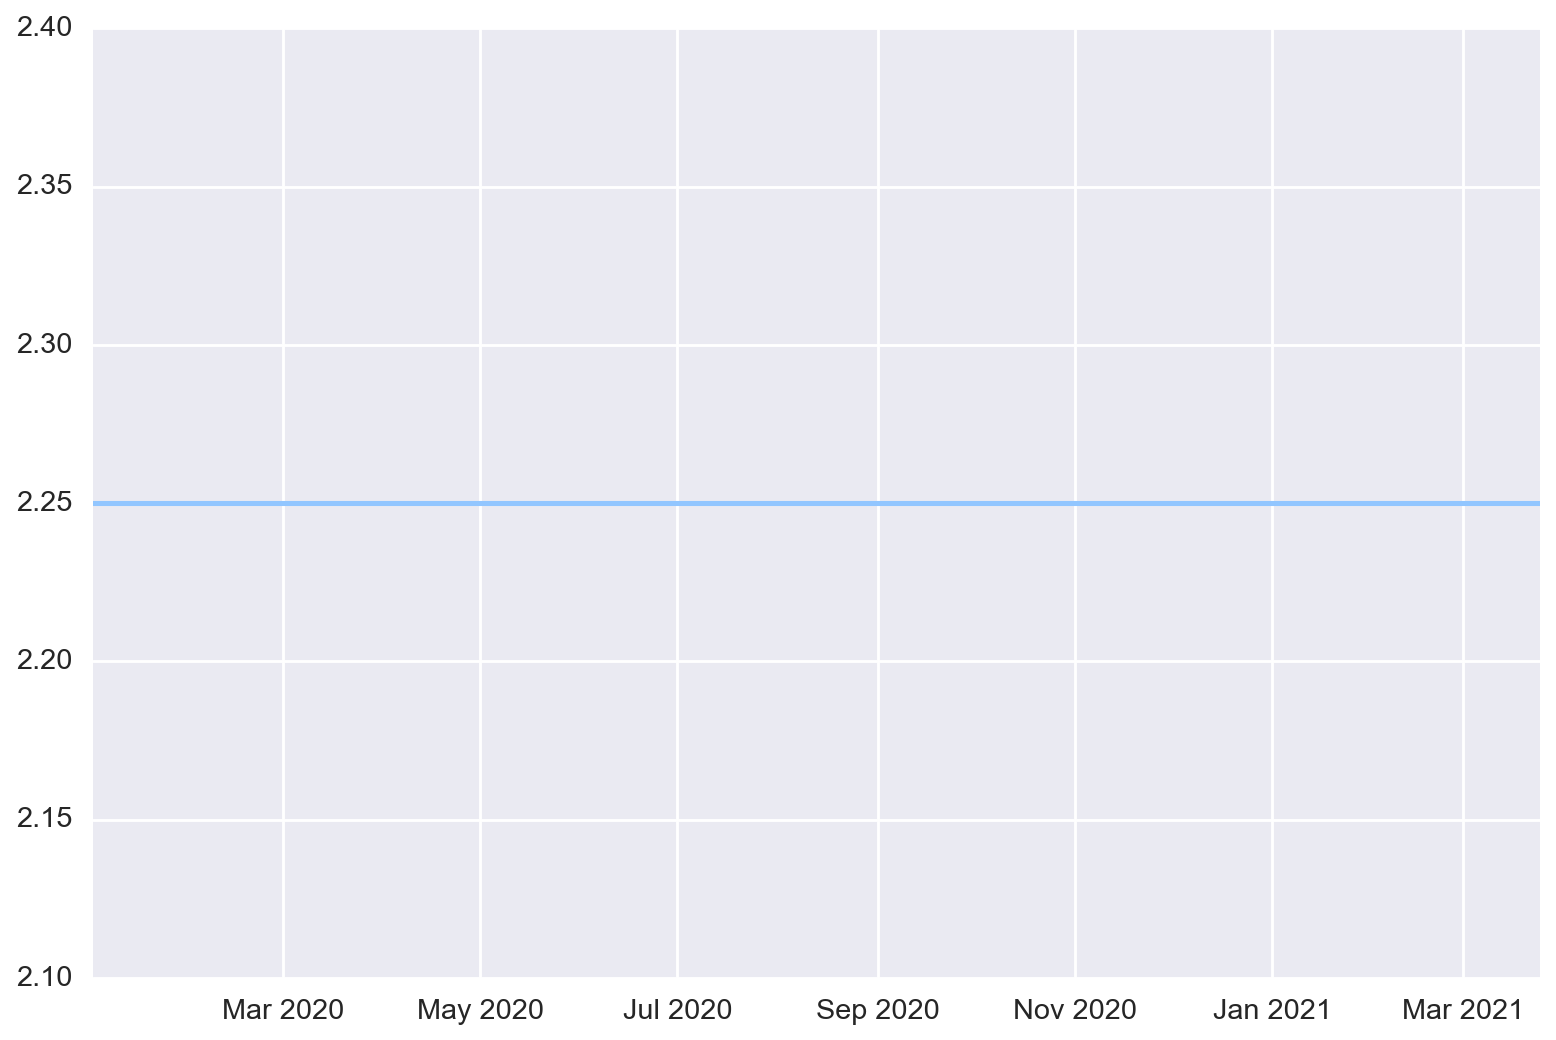

seaborn-ticks


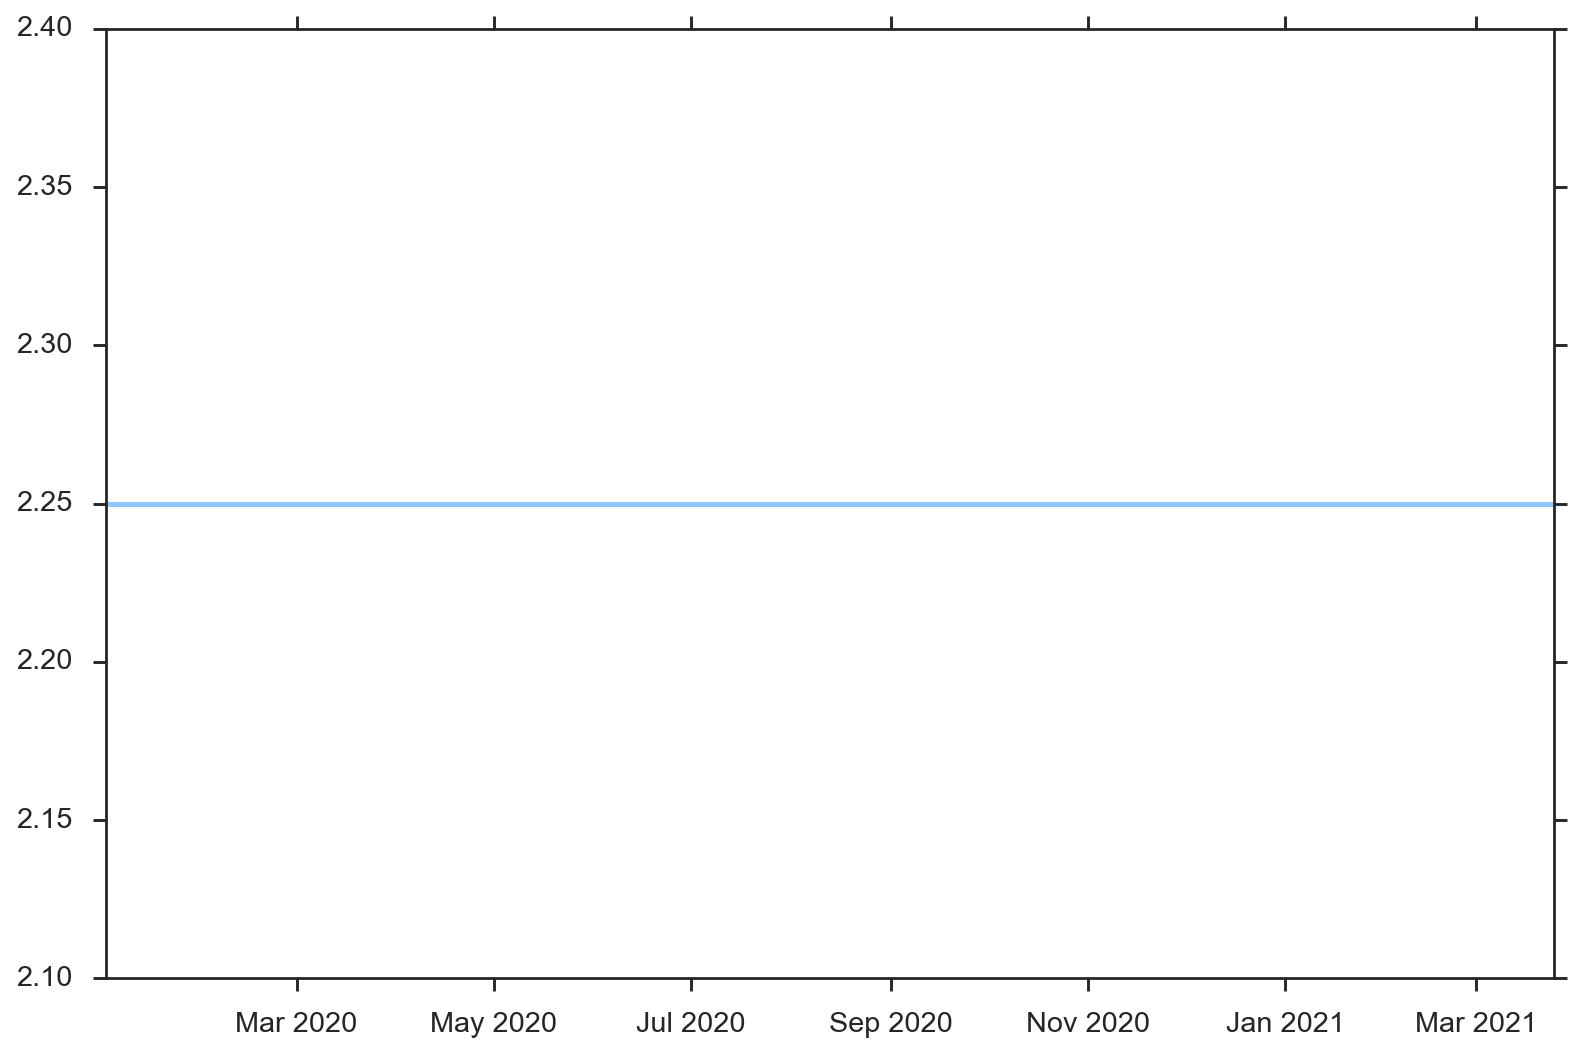

seaborn-white


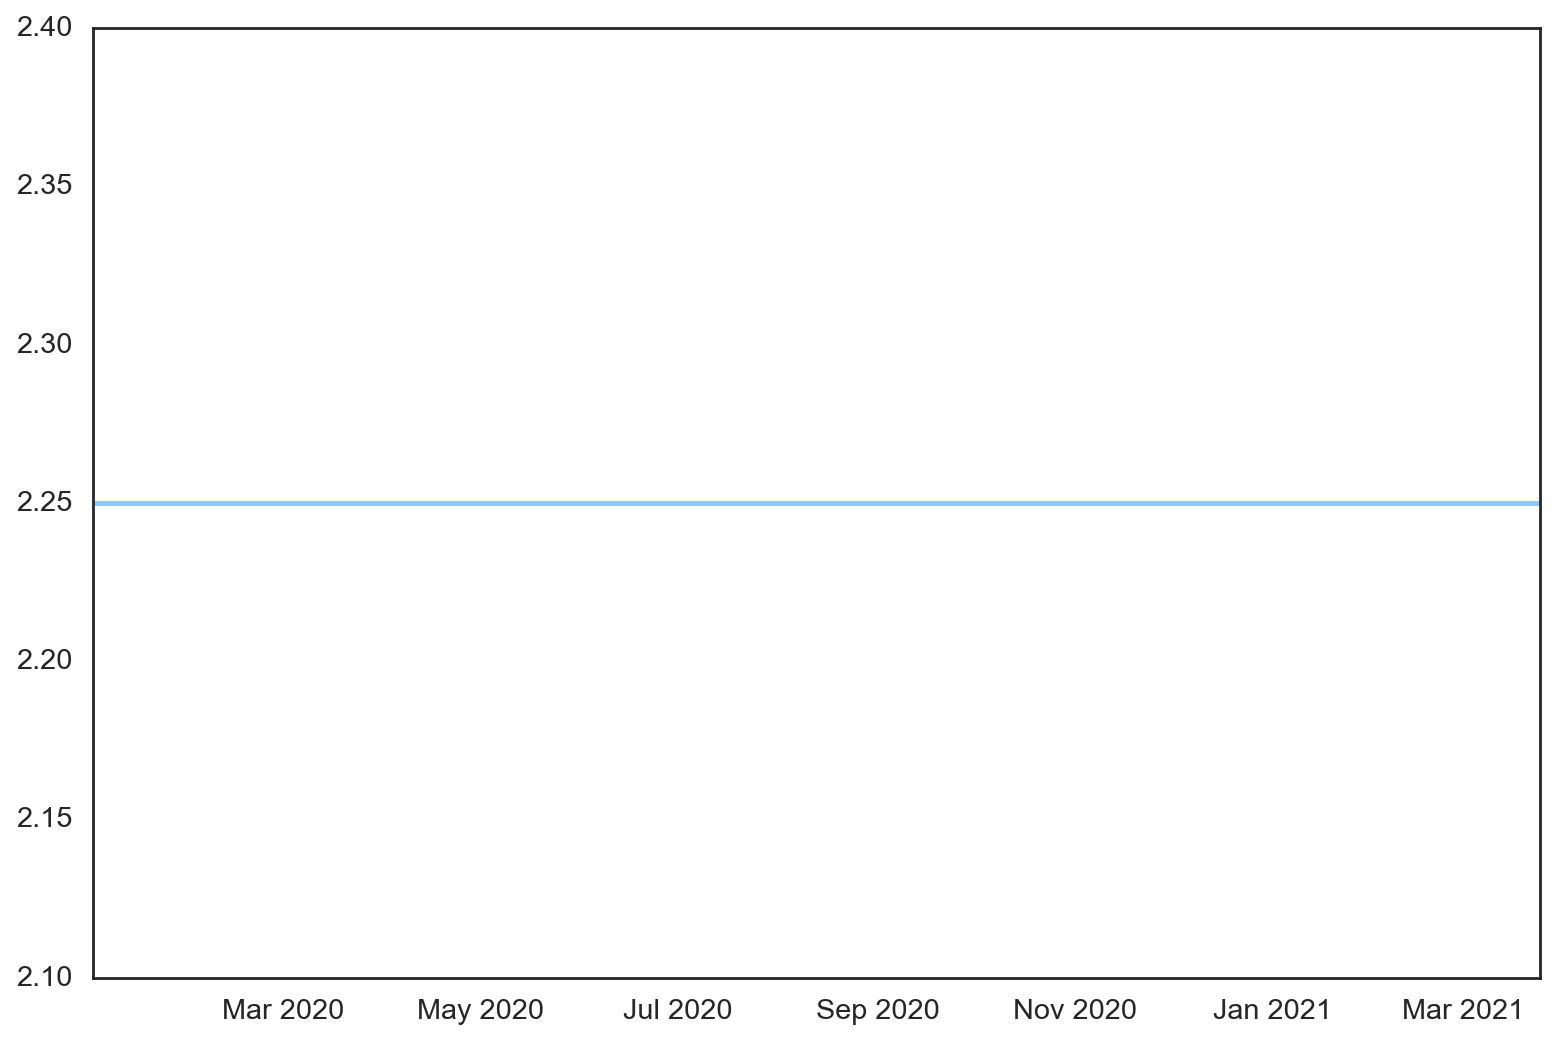

seaborn-whitegrid


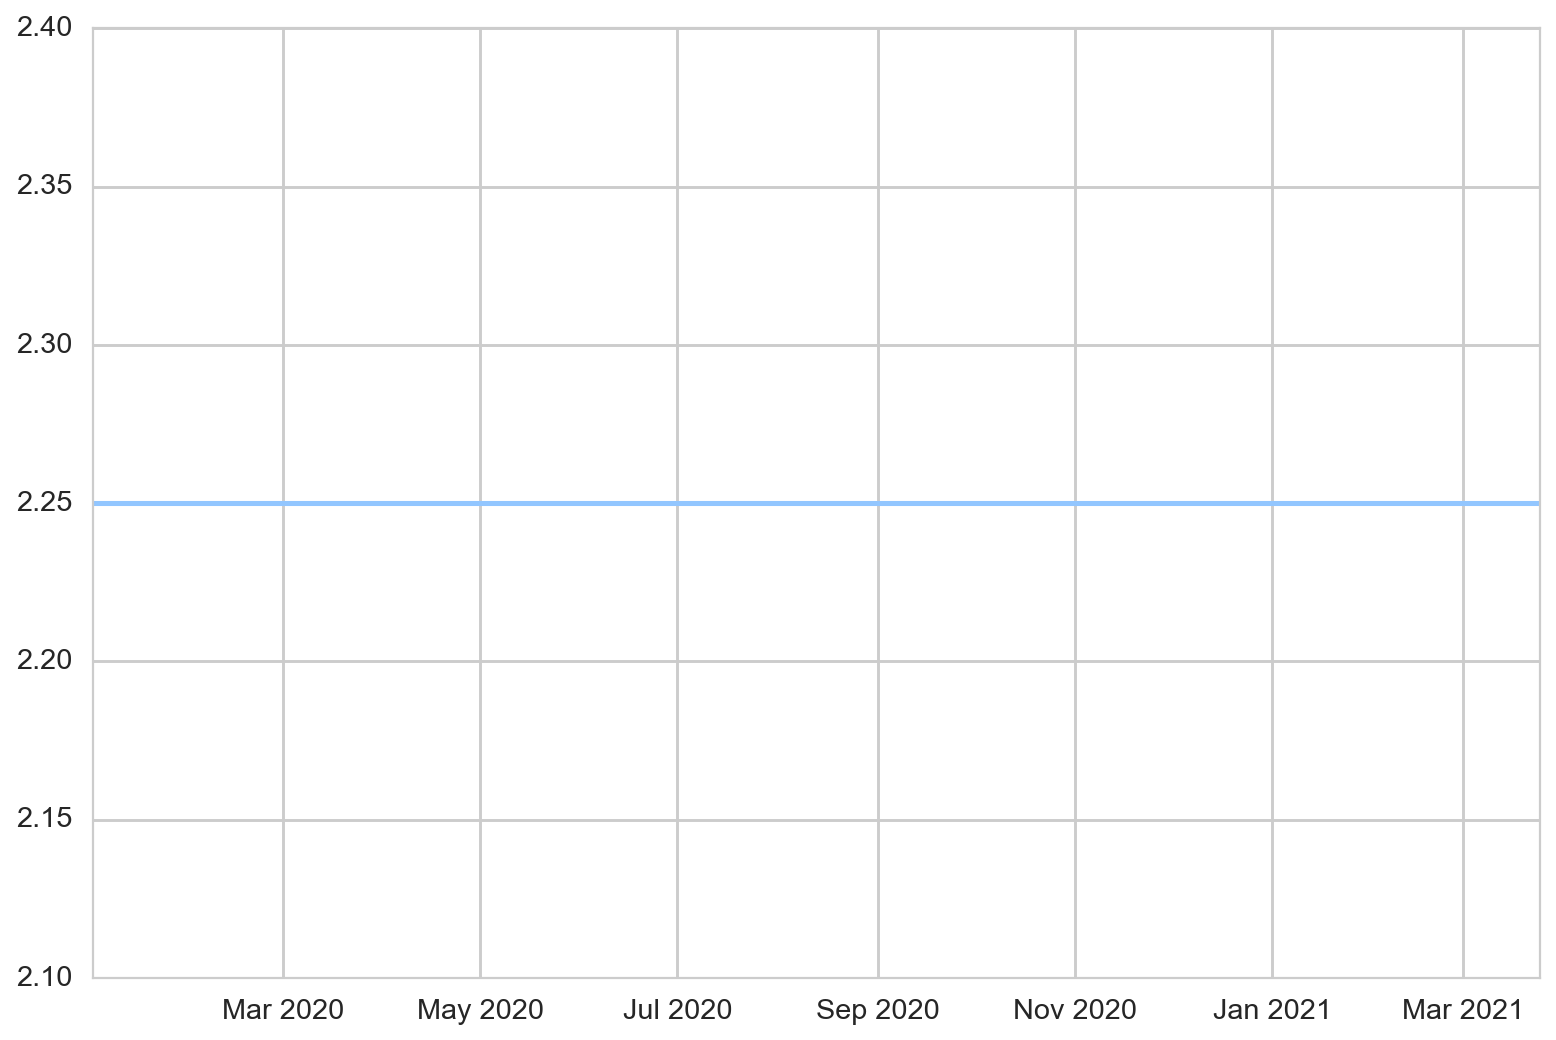

tableau-colorblind10


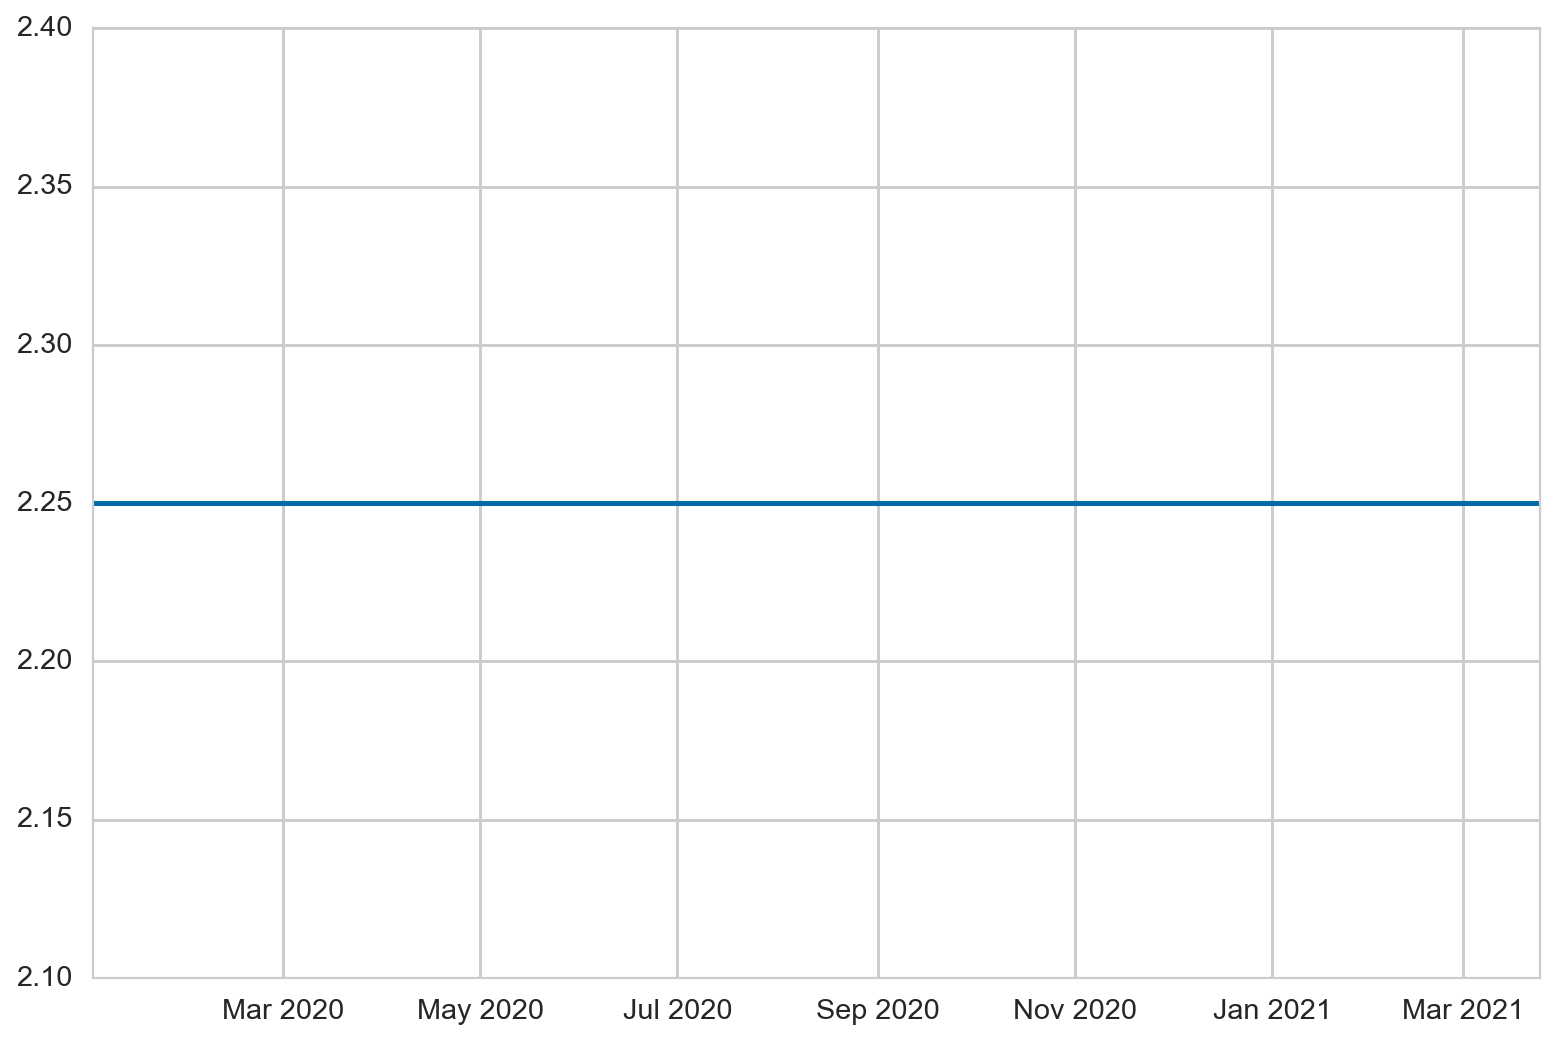

In [149]:
for i in sty:
    print(i)
    plt.style.use(i)
    plt.plot(df['cobr_raised'])
    plt.show()